# 1. Pengenalan 

***Tentang dataset:***

Dataset ini diambil dari situs UCI Machine Learning Repository. Dataset ini dibuat dari bulan May 2008 hingga bulan November 2010 (2 tahun, 6 bulan) ketika telemarketing campaign dilakukan oleh salah satu bank di Portugal. Tujuan dari campaign tersebut adalah untuk menarik minat client/nasabah dalam menggunakan instrumen investasi term deposit (deposito berjangka).


***Target project:***

Target project ini adalah untuk  untuk meningkatkan efisiensi kegiatan pemasaran team marketing dengan cara membuat model yang dapat memprediksi client - client yang memiliki potensi dalam melakukan investasi term deposit. Client yang potensial adalah client yang berdasarkan karakteristiknya (berdasarkan nilai masing - masing feature) memiliki kemungkinan besar untuk menerima tawaran dalam melakukan investasi term deposit setelah proses pemasaran telemarketing. Dengan menggunakan model yang dibangun, maka diharapkan bank dapat meningkatkan efisiensi kegiatan pemasaran telemarketing dengan cara melakukan filtering terlebih dahulu terhadap data client sehingga client yang dihubugni oleh telemarkerter/agen pemasaran merupakan client yang memang memiliki potensi tinggi (client potensial) untuk menerima tawaran investasi term deposit

### 1.1. Columns Description

| ***Column***  | ***Description***                                                                             | ***Type*** | 
| ---           | ---                                                                                           | --- |           
|age            |Umur client                                                                                    |Numeric|
|job            |Pekerjaan client                                                                               |Object|
|marital        |Status marital client                                                                          |Object|
|education      |Pendidikan terakhir client                                                                     |Object|
|default        |Status yang menerangkan apakah client pernah mengalami gagal bayar                             |Object|
|balance        |Saldo akun bank client                                                                         |Object|
|housing        |Status yang menerangkan apakah client memiliki pinjaman kredit rumah                           |Object|
|loan           |Status yang menerangkan apakah client memiliki pinjaman pribadi                                |Object|
|contact        |Alat komunikasiyang digunakan saat proses pemasaran (telephone atau celular)                   |Object|
|day            |Tanggal terakhir client dihubungi                                                              |Numeric|
|month          |Bulan terakhir client dihubungi                                                                |Object|
|duration       |Durasi waktu telfon                                                                            |Numeric|
|campaign       |Jumlah kegiatan pemasaran yang sudah pernah dilakukan pada client ini                          |Numeric|
|pdays          |Jumlah hari berlalu semenjak kontak terakhir dengan client pada proses pemasaran sebelumnya    |Numeric|
|previous       |Jumlah kegiatan pemasaran yang sudah dilakukan sebelumnya terhadap client                      |Numeric|
|poutcome       |Hasil kegiatan pemasaran sebelumnya (succes, false, atau unknown)                              |Object|
|Deposit        |Status yang menunjukan apakah client melakukan investasi term deposit setelah proses pemasaran |Numeric|



### 1.2. Problem statement

# 2. Import Libraries

In [1]:
# Import tools dasar
import pandas as pd
import numpy as np
from scipy import stats

# Library Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Library pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector

# Library outliers handling
from feature_engine.outliers import Winsorizer

# Library scaling dan encoding
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder

# Model linear regresion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Library Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Save Model
import pickle
import joblib
import json

# Library matriks regresi linear
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Libbrary untuk cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Library untuk tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# 3. Data Loading

In [2]:
# Membuat dataframe
df = pd.read_csv(r'C:\Users\Fiqih\AppData\Local\Programs\Latihan python\hacktiv8\Milestone\Milestone2\p1-ftds017-hck-m2-mfiqihalayubi\bank.csv')

# Membuat pengaturan untuk melihat seluruh kolom dataframe
pd.set_option('display.max_columns',None)

In [3]:
# Menampilkan 10 baris pertama
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [4]:
# Menampilkan 10 baris terakhir
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,unknown,no
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
# Menampilkan basic info dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Dari basic info dan dataframe di atas maka kita dapat mengambil informasi sebagai berikut :
1. Terdapat 17 kolom dan 11162 baris
2. Dari 17 kolom tersebut, tidak ada kolom yang memiliki nilai missing values (akan dilakukan pengecekan lagi)
3. Seluruh kolom memiliki tipe data yang sesuai dengan nilai yang ditampilkan
4. Nilai -1 pada kolom pdays akan kita ubah karena menyulitkan interpretasi. pdays sendiri merupakan kolom yang menerangkan jumlah hari berlalu setelah proses pemasaran sebelumnya terhadap seorang client
5. Pada kolom job terdapat value 'admin.'. Karakter titik pada value tersebut akan dihapus untuk meningkatkan kerapihan data


### 3.1. Cek data duplikat

In [6]:
# Check the number of duplicated rows
df.duplicated().sum()

0

### 3.2. Cek missing values

In [7]:
# Check the number of missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
df['day'].value_counts()

day
20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: count, dtype: int64

### 3.3. Mengganti nilai pada kolom pdays

Kolom ini menerangkan berapa lama hari yang telah berlalu sejak client dihubungi oleh agen pemasaran pada proses penawaran sebelumnya. Permasalahan pada kolom ini adalah terdapat nilai -1 yang mana nilai tersebut memiliki arti jika client belum pernah dihubungi oleh agen pemasaran. Nilai -1 akan kita ganti menjadi 0 agar lebih mudah untuk diinterpretasikan. Namun sebelum itu, kita akan melakukan pengecekan apakah terdapat nilai 0 pada kolom pdays, jika iya maka kita harus melihat apakah pesan yang dimaksud pada nilai -1 sama seperti pesan pada nilai 0.

In [9]:
# Cek jumlah nilai 0
len(df.loc[df['pdays'] == 0])

0

In [10]:
# Cek jumlah nilai -1
len(df.loc[df['pdays'] == -1])

8324

Dari hasil di atas dapat terlihat jika tidak ada baris pada kolom pdays yang bernilai 0 sementara terdapat 8324 baris pada kolom pdays yang bernilai -1. Oleh karena itu kita akan mengganti nilai -1 pada kolom tersebut menjadi 0

In [11]:
# Mengganti nilai -1 menjadi 0
df['pdays'] = df['pdays'].replace(-1,0)

In [12]:
# Cek hasil
print(f'Jumlah nilai -1 = {len(df.loc[df["pdays"] == -1])}')
print(f'Jumlah nilai 0 = {len(df.loc[df["pdays"] == 0])}')

Jumlah nilai -1 = 0
Jumlah nilai 0 = 8324


# 4. EDA

In [13]:
# Copy dataframe utama 
dfeda = df.copy(deep=True)

### 4.1. Informasi dasar statistik deskriptif

#### Kolom numerik

In [14]:
# Menampilkan basic info statistik deskriptif dari kolom numerik
dfeda.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,52.076151,108.399706,0.0,0.0,0.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


From the data above, we can get insight :
1. The average age of the client is 41 years old with a minimum age is 18 years old and a maximum age is 95 years old. It means that, most likely the targeted clients are from the group who already have permanent job positions, family (wife and children), and house. However since the standard deviation (std) is quite high for this attribute, we need to make further analysis to get clear information.

2. The average balance of the client is 1528 euros with a minimum value of around - 6847 euros and a maximum value of around 81204 euros. From Numbeo sites (https://www.numbeo.com/cost-of-living/country_result.jsp?country=Portugal), the estimated average monthly living cost in portugal for a family of four is 2356 euros, and for a single person, the estimated value is 668.2 euro. It means that, most likely the majority of clients come from the middle class segment with single marital status. Moreover, a negative value in minimal balance can tell us that some client has loans to the bank and a maximum value can tell us that there are people that come from a high class segment since the value of 81204 euro is quite big enough

3. The average frequency of campaigns to one client is 2 (rounded) with a minimum frequency is 1 and a maximum frequency is 63. The maximum frequency is quite high which can tell us that most likely there are customers that have big prospects and a big interest in depositing their money

4. The average pdays are quite long (51 days). It can tell us that many campaigns have failed to make customers subscribe to term deposit


Dari data di atas, kita bisa mendapatkan insight :
1. Rata-rata usia klien adalah 41 tahun dengan usia minimum 18 tahun dan maksimum 95 tahun. Artinya, kemungkinan besar klien yang ditargetkan berasal dari kelompok yang telah memiliki pekerjaan tetap, keluarga (istri dan anak), dan rumah. Namun karena standar deviasi (std) untuk atribut ini cukup tinggi, maka perlu dilakukan analisis lebih lanjut untuk mendapatkan informasi yang lebih jelas.

2. Saldo rata-rata klien adalah 1528 euro dengan nilai minimum sekitar - 6847 euro dan nilai maksimum sekitar 81204 euro. Dari situs Numbeo (https://www.numbeo.com/cost-of-living/country_result.jsp?country=Portugal), perkiraan biaya hidup bulanan rata-rata di Portugal untuk keluarga beranggotakan empat orang adalah 2356 euro, dan untuk satu orang, perkiraan nilainya adalah 668,2 euro. Artinya, kemungkinan besar mayoritas klien berasal dari segmen kelas menengah dengan status pernikahan lajang. Selain itu, nilai negatif pada saldo minimal dapat memberi tahu kita bahwa beberapa klien memiliki pinjaman ke bank dan nilai maksimum dapat memberi tahu kita bahwa ada orang yang berasal dari segmen kelas atas karena nilai 81204 euro cukup besar.

3. Frekuensi rata-rata kampanye ke satu klien adalah 2 (dibulatkan) dengan frekuensi minimum 1 dan frekuensi maksimum 63. Frekuensi maksimum yang cukup tinggi ini dapat menunjukkan bahwa kemungkinan besar terdapat nasabah yang memiliki prospek dan minat yang besar untuk mendepositokan uangnya.

4. Rata-rata pdays cukup panjang (52 hari). Kemungkinan hal ini terjadi karena banyaknya proses pemasaran sebelumnya yang gagal dalam menarik client untuk berinvestasi term deposit



#### Categorical columns

In [15]:
# Menampilkan basic info statistik deskriptif dari kolom kategorik
dfeda.describe(include='object').T

,count,unique,top,freq
job,11162,12,management,2566
marital,11162,3,married,6351
education,11162,4,secondary,5476
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
contact,11162,3,cellular,8042
month,11162,12,may,2824
poutcome,11162,4,unknown,8326
deposit,11162,2,no,5873


Dari data di atas, kita dapat mengambil kesimpulan sebagai berikut :
1. Sebagian besar client berstatus menikah

2. Sebagian besar client memiliki tingkat pendidikan terakhir secondary (setingkat SMA) sebagai tingkat pendidikan terakhir mereka

3. Mayoritas client tidak memiliki dan belum pernah memiliki status default credit

4. Sebagian besar client tidak memiliki pinjaman kredit rumah

5. Sebagian besar kegiatan pemasaran dilakukan melalui telepon seluler

6. Sebagian besar nasabah yang telah dihubungi tidak berminat untuk melakukan investasi term deposit


### 4.2. Analisis Univariat

#### Distribusi nilai kolom target

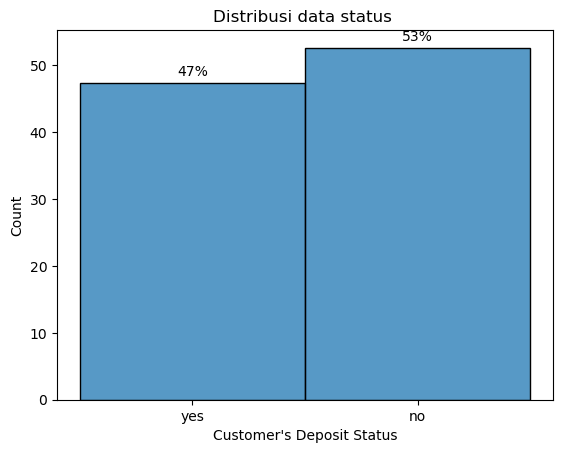

In [16]:
# Membuat grafik histogram
ax = sns.histplot(data=dfeda, x="deposit",stat='percent')
# Menampilkan nilai pada tiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3, fontsize=10, color='black')
plt.title('Distribusi data status deposit')
plt.xlabel('Customer\'s Deposit Status')
plt.ylabel('Count')
plt.show()

In [17]:
# Menampilkan variasi nilai balance
print(f'Precentage of client who subscribe the term deposit = {round(len(df.loc[df["deposit"] == "yes"])*100/len(df))} %')
print(f'Precentage of client who didn\'t subscribe the term deposit = {round(len(df.loc[df["deposit"] == "no"])*100/len(df))} %')

Precentage of client who subscribe the term deposit = 47 %
Precentage of client who didn't subscribe the term deposit = 53 %


Dari grafik histogram di atas, kita dapat menyimpulkan jika kolom target hampir memiliki distribusi data yang seimbang (balance) antar 2 nilai nya ('yes' atau 'no'). Presentase client yang belum berinvestasi pada term deposit (deposito berjangka) setelah dihubungi oleh agen pemasaran adalah sebesar 53 %, sementara presentase client yang memutuskan untuk berinvestasi setelah dihubingi oleh agen pemasaran adalah sebesar 47 % (lebih rendah 6 % dibandingkan yang belum menggunakan). Ini artinya, pemasaran yang dilakukan oleh bank ini untuk membuat client berinvestasi pada term deposit memiliki keberhasilan sekitar 47 %.

#### Presentase client yang dihubungi berdasarkan jenis pekerjaannya

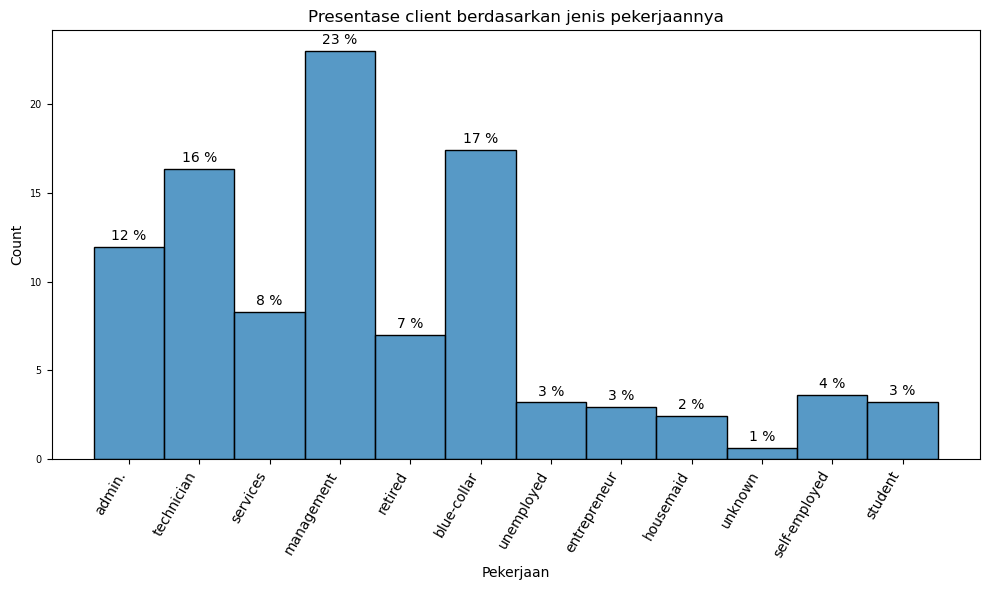

In [18]:
# Histogram graph of Customer's Deposit Status
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=dfeda, x="job", discrete=True, stat='percent')

# Menambahkan anotasi pada setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)} %', xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Menambahkan judul dan label
plt.title('Presentase client berdasarkan jenis pekerjaannya')
plt.xlabel('Pekerjaan')
plt.ylabel('Count')
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.yticks(fontsize=7)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [19]:
dfeda['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

Dari grafik histogram di atas kita dapat melihat jika jenis pekerjaan client dengan presentase terbesar adalah pekerjaan management (23 %). Sementara itu, 3 pekerjaan lain yang memiliki presentase jumlah di atas 10 % adalah pekerjaan blue collar (buruh) dengan presentase sebesar 17 %, pekerjaan technician dengan presentase 16 %, dan pekerjaan admin dengan presentase 12 %. ***Keempat pekerjaan dengan presentase terbesar tersebut berasal dari 68 % dari total client yang dihubungi***

Selain itu, terdapat beberapa client yang sebenarnya kurang tepat untuk dihubungi jika dilihat dari jenis atau status pekerjaannya. Client - client tersebut adalah client dengan status pensiun (7 %) dan client dengan status student (3 %). Kemungkinan hal ini terjadi karena data client yang akan dihubungi belum diperbaharui. 

***Note :***
Saya belum memahami secara pasti apa yang dimaksud pekerjaan management pada dataset ini, tapi kemungkinan besar arti management yang dimaksud adalah semua pekerjaan yang difungsikan untuk mengatur aktivitas organisasi perusahaan baik dari segi operasional produksi, pemasaran, maupun oprasional perusahaan pada umumnya.

#### Distribusi data client berdsarkan umur

<Axes: >

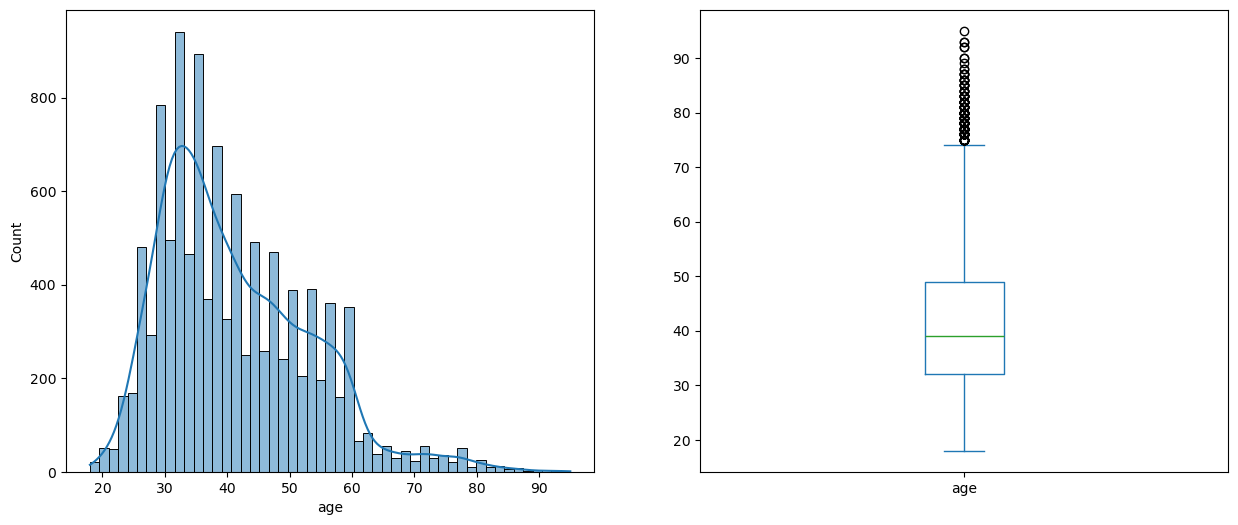

In [20]:
# Menampilkan distribusi data client berdasarkan umur
fig, ax = plt.subplots(ncols=2,figsize=(15,6))
sns.histplot(data=dfeda, x="age", kde=True,ax=ax[0])
dfeda['age'].plot(kind='box',ax=ax[1])

Dari kedua grafik di atas, kita dapat mengambil kesimpulan jika ***mayoritas client memiliki umur di antara 20 hingga 50 tahun. Jika kita lihat pada rentang Q1 sampai Q3 pada grafik box plot, maka dapat disimpulkan jika 75 % client memiliki umur di atas 18 tahun dan di bawah 50 tahun.*** Selain itu, terdapat nilai ekstrim (outlier) pada atribut umur dimana terdapat sebagian kecil client yang memiliki umur di atas 75 tahun, bahkan kita dapat melihat client yang memiliki umur di atas 90 tahun. 

Sebuah pertanyaan mungkin akan muncul mengenai kenapa agen pemasaran masih menawarkan term deposit pada client yang memiliki usia tidak produktif. Ada 2 kemungkinan mengapa hal ini terjadi. Pertama, dataset client yang digunakan untuk menghubungi client bukanlah dataset terupdate. Kedua, client pada usia non produktif tersebut memang masih aktif dalam melakukan transaksi perbankan dan client tersebut memiliki balance yang cukup tinggi. Jika kemungkinan kedua yang menjadi penyebabnya, maka hal ini tidak mengindikasikan suatu masalah. Namun jika kemungkinan pertama yang menjadi penyebabnya, maka hal ini mengindikasikan adanya masalah dalam proses pengumpulan data client. Hal tersebut menjadi masalah karena memasarkan term deposit pada client dengan usia tidak produktif tanpa alasan yang logis merupakan tindakan pemasaran yang tidak masuk akal dan hanya mengurangi efektivitas pemasaran.

#### Presentase data client berdasarkan histori status gagal bayar

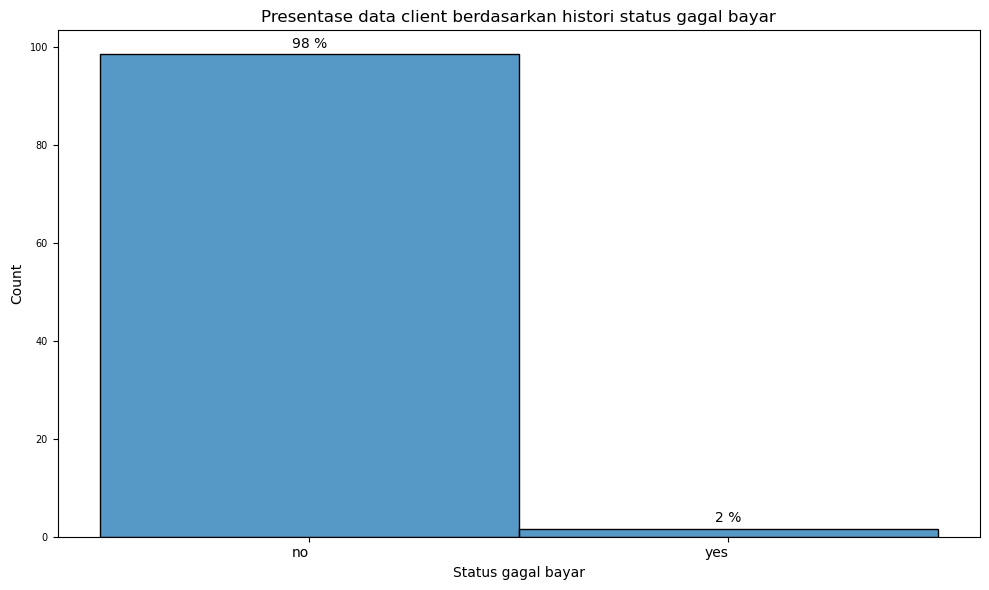

In [21]:
# Histogram graph of Customer's Deposit Status
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=dfeda, x="default", discrete=True, stat='percent')

# Menambahkan anotasi pada setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)} %', xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Menambahkan judul dan label
plt.title('Presentase data client berdasarkan histori status gagal bayar')
plt.xlabel('Status gagal bayar')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right', fontsize=10)
plt.yticks(fontsize=7)

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari grafik presentase dia tas kita dapat melihat jika 98 % client yang dihubungi tidak memiliki histori status gagal bayar sementara 2 % nya memiliki status tersebut.

#### Presentase data client berdasarkan ada atau tidaknya pinjaman

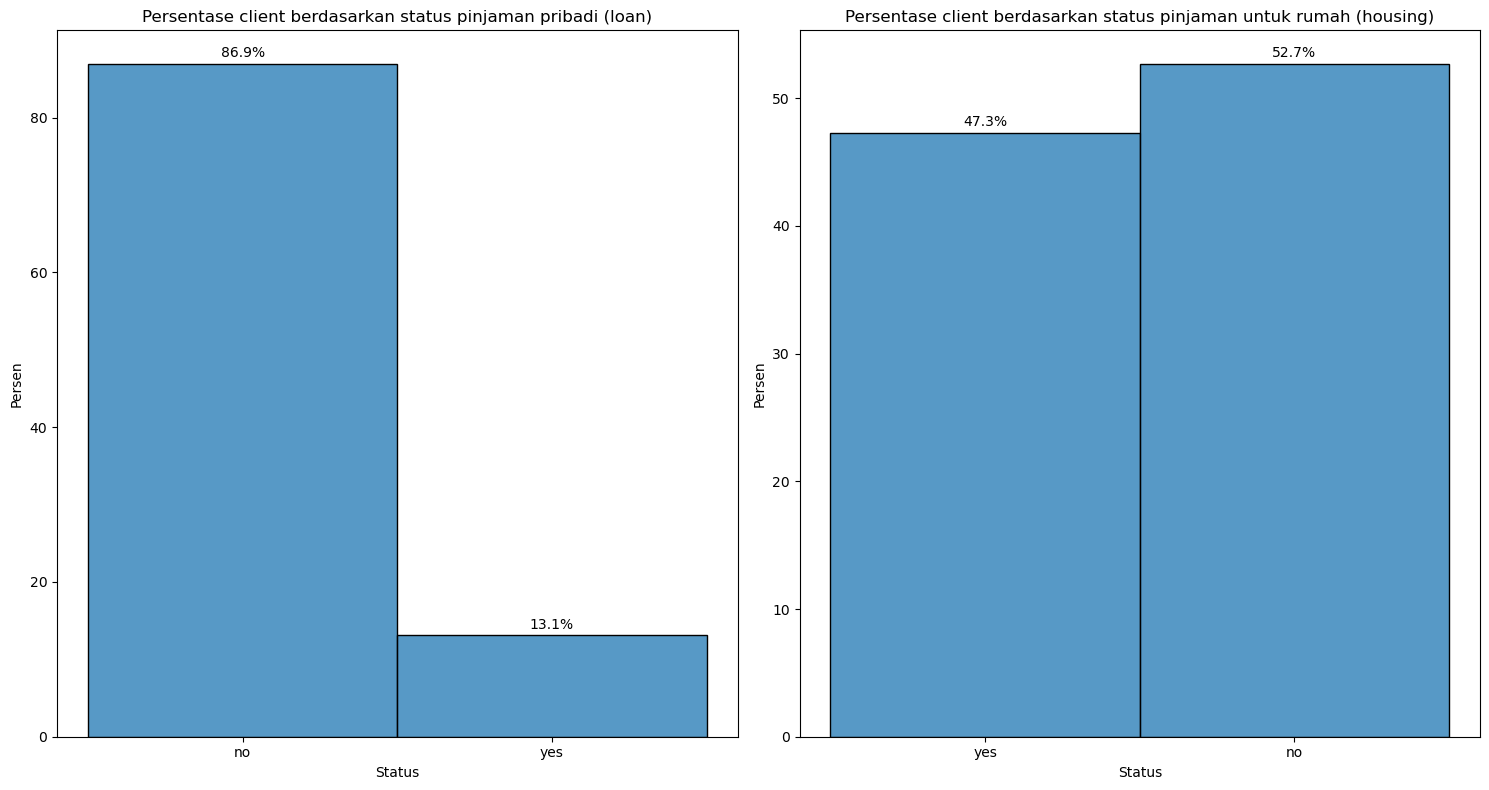

In [22]:
# Membuat figure dan subplots
fig, ax = plt.subplots(ncols=2, figsize=(15, 8))

# Membuat histogram untuk 'loan'
sns.histplot(data=dfeda, x="loan", ax=ax[0], stat='percent')
# Menambahkan anotasi pada setiap bar di 'loan'
for p in ax[0].patches:
    height = p.get_height()
    ax[0].annotate(f'{height:.1f}%', xy=(p.get_x() + p.get_width() / 2, height),
                   xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Membuat histogram untuk 'housing'
sns.histplot(data=dfeda, x="housing", ax=ax[1], stat='percent')
# Menambahkan anotasi pada setiap bar di 'housing'
for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f'{height:.1f}%', xy=(p.get_x() + p.get_width() / 2, height),
                   xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Menambahkan judul dan label
ax[0].set_title('Persentase client berdasarkan status pinjaman pribadi (loan)')
ax[0].set_xlabel('Status')
ax[0].set_ylabel('Persen')


ax[1].set_title('Persentase client berdasarkan status pinjaman untuk rumah (housing)')
ax[1].set_xlabel('Status')
ax[1].set_ylabel('Persen')


# Menampilkan plot
plt.tight_layout()
plt.show()

Dari grafik di sebelah kiri, kita dapat melihat jika 86.9 % client (mayoritas) yang dihubingi tidak memiliki pinjaman pribadi. Sementara itu, dari grafik di sebelah kanan kita dapat menyimpukan, jika distribusi client berdasarkan ada atau tidaknya pinjaman untuk pembelian rumah cenderung seimbang (balance) dimana 47.3 % client yang dihubungi memiliki pinjaman untuk membeli rumah sementara 52.7 % client tidak memiliki pinjaman tersebut.

Hal ini mengindikasikan jika kemungkinan besar bank lebih memilih untuk menawarkan term deposit pada client tanpa pinjaman pribadi dibandingkan client yang memiliki pinjaman tersebut. Untuk status ada tidaknya pinjaman untuk membeli rumah, tampaknya bank tidak terlalu mementingkan status tersebut karena presentase client yang memiliki atau tidak memiliki pinjaman tersebut terlihat cenderung seimbang.

***Catatan :***
Yang dimaksud pinjaman untuk membeli rumah dapat diartikan juga sebagai kredit pemilikan rumah

### 4.2. Analisis Bivariat

#### Hubungan antara jumlah campaign yang dilakukan dengan keputusan client dalam berinvestasi

Dibawah ini merupakan grafik yang menampilkan hubungan antara jumlah campaign atau penwaran yang sudah dilakukan sebelumnya terhadap keputusan client dalam menginvestasikan uangnya pada instumen term depost.

Text(0, 0.5, 'Count')

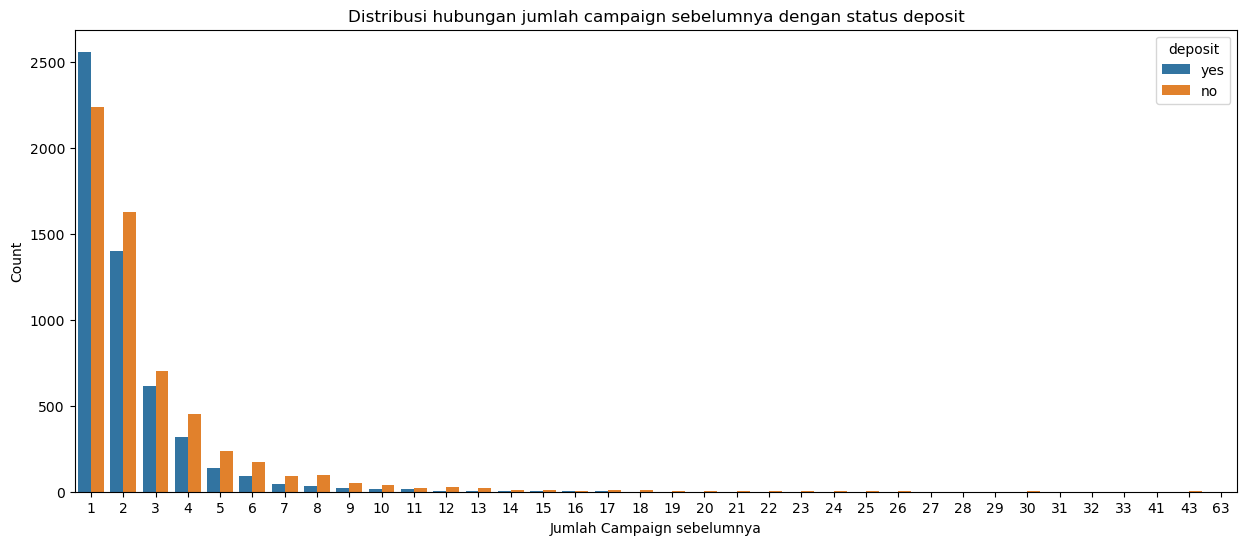

In [23]:
# Memperbesar grafik
plt.figure(figsize=(15, 6))

# Membuat countplot
sns.countplot(data=dfeda, x="campaign", hue="deposit")

# Mengatur rotasi label x untuk keterbacaan lebih baik
plt.xticks(rotation=0)  # Tetap pada rotasi 0 derajat, sesuaikan jika diperlukan

# Menambahkan judul dan label sumbu
plt.title('Distribusi hubungan jumlah campaign sebelumnya dengan status deposit')
plt.xlabel('Jumlah Campaign sebelumnya')
plt.ylabel('Count')

Dari grafik di atas kita dapat menyimpulkan beberapa hal :
1. Pada proses campaign pertama, terdapat beberapa client yang belum bisa memutuskan untuk melakukan investasi term deposit sehingga agen pemasaran akan menghubungi client - client tersebut di masa depan untuk memastikan keinginan mereka dalam berinvestasi pada instrumen investasi ini.  

2. Campaign pertama lebih memungkinkan untuk membuat client yakin dalam melakukan investasi term deposit. Hal ini dapat dilihat dari grafik dimana lebih banyak client yang melakukan investasi term deposit dibandingkan yang tidak melakukannya ketika campaign dilakukan dalam 1 kali proses

3. Makin banyak proses campaign pada suatu client maka makin kecil kemungkinan client tersebut mau melakukan investasi term deposit. Hal ini dapat dilihat pada jumlah campaign yang dilakukan lebih dari 1 kali dimana sebagian besar client justru menolak untuk melakukan investasi. Kasus - kasus seperti ini sebaiknya dihindari

4. ***Dari ketiga kesimpulan di atas maka dapat diambil kesimpulan utama yaitu, proses campaign yang dilakukan pertama kali pada suatu client lebih penting dan lebih mungkin untuk menarik minat client tersebut dalam melakukan investasi term deposit***

***Note:*** 
Mendapatkan client dalam 1 kali proses campaign dapat memberikan dampak positif terhadap perusahaan karena penggunaan modal dalam melakukan kegiatan pemasaran menjadi lebih efisien (customer acquisition cost menjadi lebih kecil)

#### Hubungan jenis pekerjaan dengan keputusan client dalam berinvestasi

Dibawah ini merupakan grafik yang menunjukan hubungan antara jenis pekerjaan client dengan keputusan mereka dalam melakukan investasi term deposit. Terdapat 12 jenis pekerjaan dimana 2 diantaranya menerangkan status tidak bekerja karena sudah pensiun dan tidak bekerja karena sesuatu yang belum diketahui. Selain itu, terdapat 1 nilai yang menerangkan bahwa pekerjaan dari client tersebut belum diketahui (unknown).

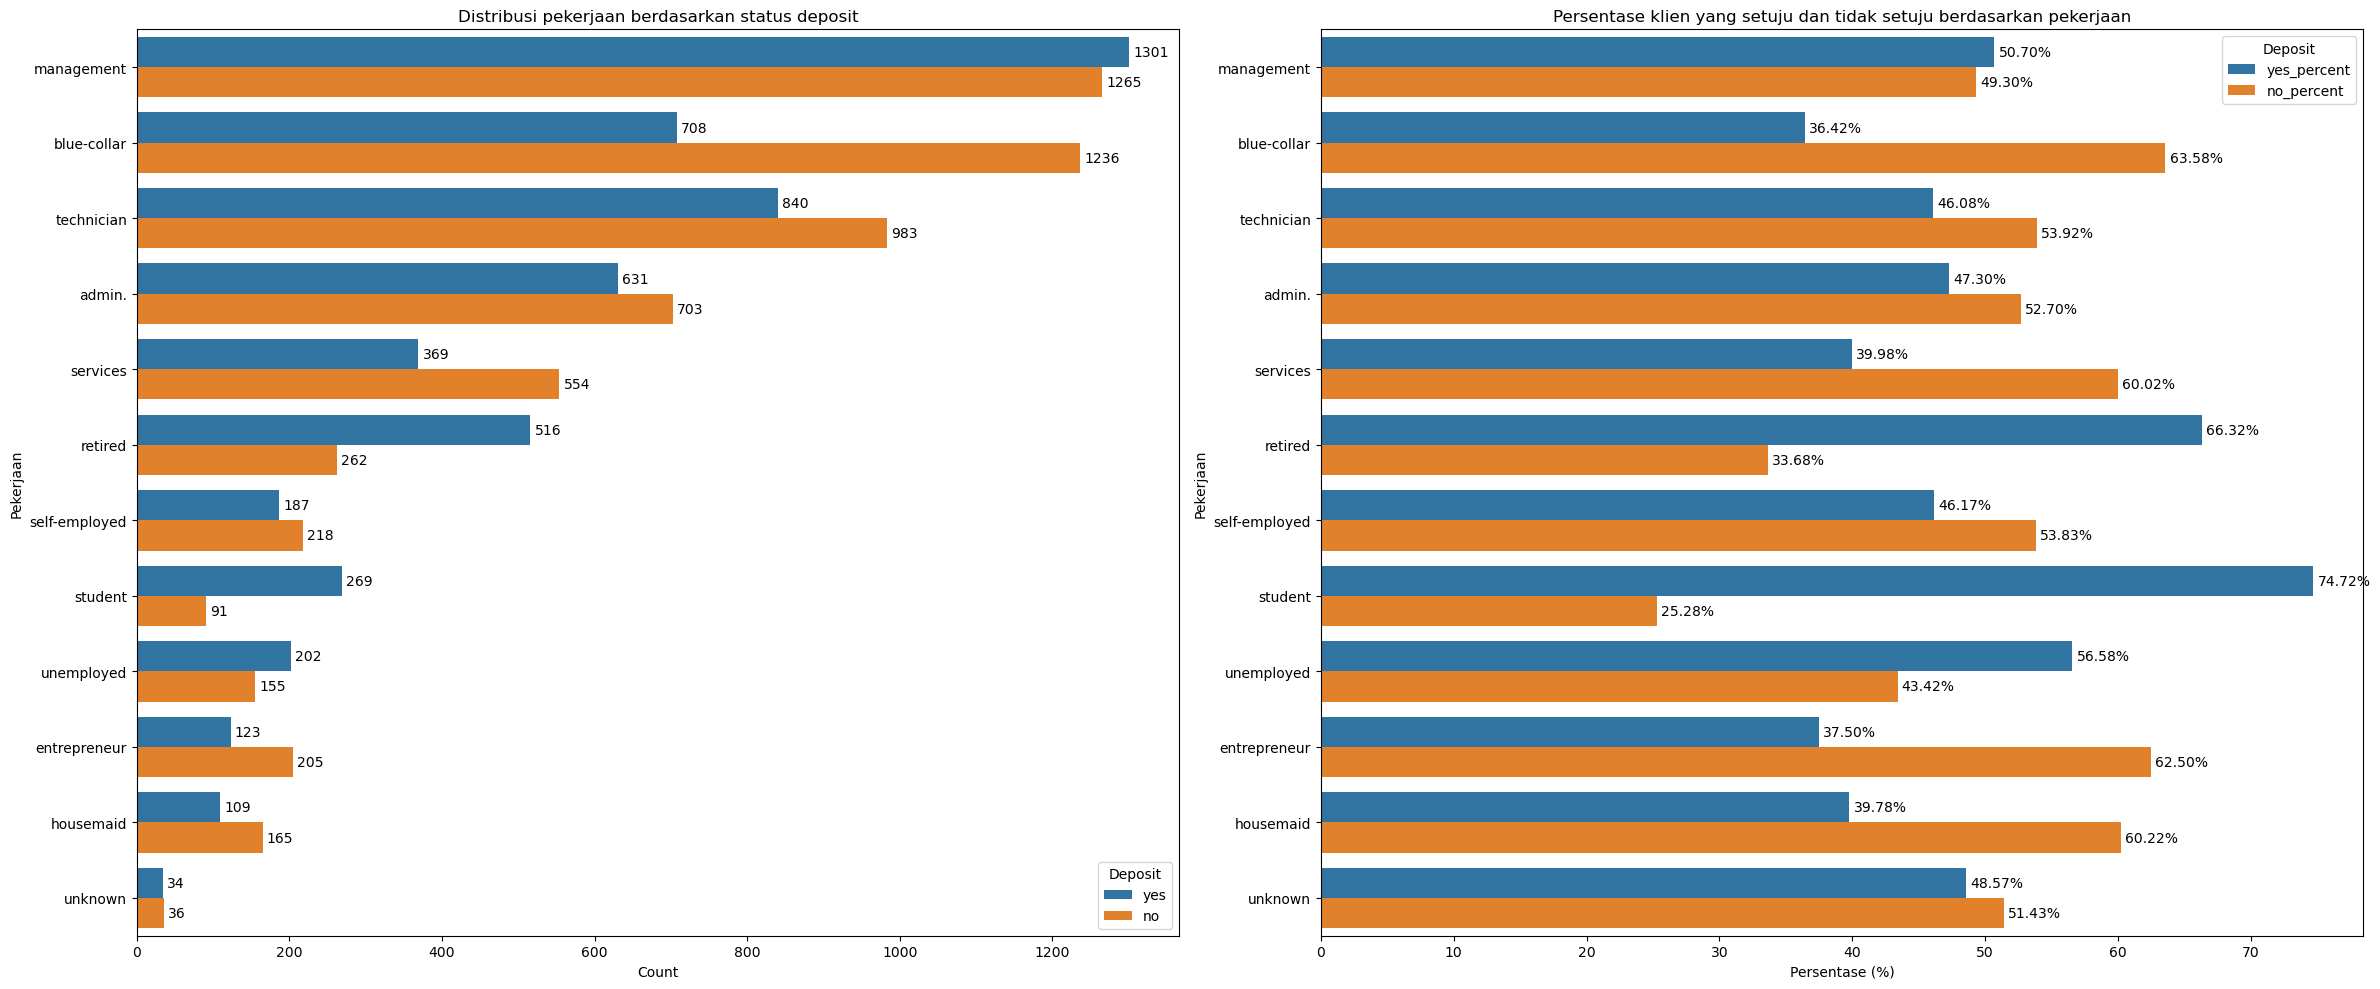

In [24]:
# Menghitung jumlah cient berdasarkan pekerjaan dan status deposit
job_deposit_counts = dfeda.groupby(['job', 'deposit']).size().unstack(fill_value=0)

# Menghitung persentase client yang setuju dan tidak setuju untuk melakukan investasi berdasarkan pekerjaannya
job_deposit_counts['total'] = job_deposit_counts.sum(axis=1)
job_deposit_counts['yes_percent'] = (job_deposit_counts['yes'] / job_deposit_counts['total']) * 100
job_deposit_counts['no_percent'] = (job_deposit_counts['no'] / job_deposit_counts['total']) * 100
job_order = job_deposit_counts.sort_values(by='total', ascending=False).index

# Membuat DataFrame untuk persentase
job_deposit_percent = job_deposit_counts[['yes_percent', 'no_percent']].reset_index().melt(id_vars='job', var_name='deposit', value_name='percent')
dfeda['job'] = pd.Categorical(dfeda['job'], categories=job_order, ordered=True)
job_deposit_percent['job'] = pd.Categorical(job_deposit_percent['job'], categories=job_order, ordered=True)

# Grafik pertama: jumlah client yang setuju atau tidak setuju untuk melakukan investasi berdasarkan pekerjaannya
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))
ax1 = axes[0]
sns.countplot(data=dfeda, y="job", hue="deposit", ax=ax1, order=job_order)
ax1.set_title('Distribusi pekerjaan berdasarkan status deposit')
ax1.set_xlabel('Count')
ax1.set_ylabel('Pekerjaan')
ax1.legend(title='Deposit', loc='best')

# Menampilkan nilai pada tiap bar
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')

# Grafik kedua: presentase client yang setuju  atau tidak setuju untuk melakukan investasi berdasarkan pekerjaannya
ax2 = axes[1]
sns.barplot(data=job_deposit_percent, x='percent', y='job', hue='deposit', ax=ax2, order=job_order)
ax2.set_title('Persentase klien yang setuju dan tidak setuju berdasarkan pekerjaan')
ax2.set_xlabel('Persentase (%)')
ax2.set_ylabel('Pekerjaan')
ax2.legend(title='Deposit', loc='best')

# Menampilkan nilai pada tiap bar
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f%%', label_type='edge', padding=3, fontsize=10, color='black')


plt.tight_layout()
plt.show()

Dari grafik di atas kita dapat mengambil beberapa kesimpulan :
1. Sebagian besar client yang memutuskan untuk menginvestasikan uangnya pada instrumen term deposit memiliki pekerjaan (di level) management. Conversion rate yang didapatkan dalam melakukan penawaran pada client dengan pekerjaan ini adalah sebesar 50.7 %. Urutan kedua berasal dari pekerjaan technician dengan tingkat conversion rate sebesar 46.08 %, lalu diikuti dengan client yang memiliki pekerjaan sebagai blue collar dengan tingkat conversion rate sebesar 36.42 %, dan client yang memiliki pekerjaan sebagai admin dengan tingkat conversion rate sebesar 47.30 %

2. Jika dilihat dari conversion rate (presentase keberhasilan pemasara yang membuat client memutuskan untuk melakukan investasi), maka client dengan pekerjaan sebagai student, retired, dan unemployed menjadi client dengan tingkat conversion rate tertinggi dimana untuk student tingkat conversion ratenya sebesar 74.72 %, retired sebesar 66.32 %, dan unemployed sebesar 56.58 %. Hal ini cukup mengejutkan karena client - client dengan tingkat conversion rate tertinggi justru berasal dari client - client yang tidak memiliki pekerjaan aktif. ***Kemungkinan hal ini terjadi karena orang - orang yang tidak memiliki pekerjaan aktif lebih memilih untuk mengurangi konsumsinya dan memfokuskan sumber dayanya pada instument - instrument yang dapat menghasilkan pasive income***

#### Distribusi client balance (saldo bank) terhadap keputusan client dalam berinvestasi (status deposit)

Dibawah ini merupakan grafik boxenplot dan violinplot yang menggambarkan distribusi saldo bank (balance) client terhadap keputusan mereka dalam melakukan investasi term deposit setelah dilakukan pemasaran.

C:\Users\Fiqih\AppData\Local\Temp\ipykernel_20128\2063780703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=dfeda, x='balance', y='deposit', ax=axs[0], palette='deep')
C:\Users\Fiqih\AppData\Local\Temp\ipykernel_20128\2063780703.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dfeda, x='balance', y='deposit', ax=axs[1], palette='deep')


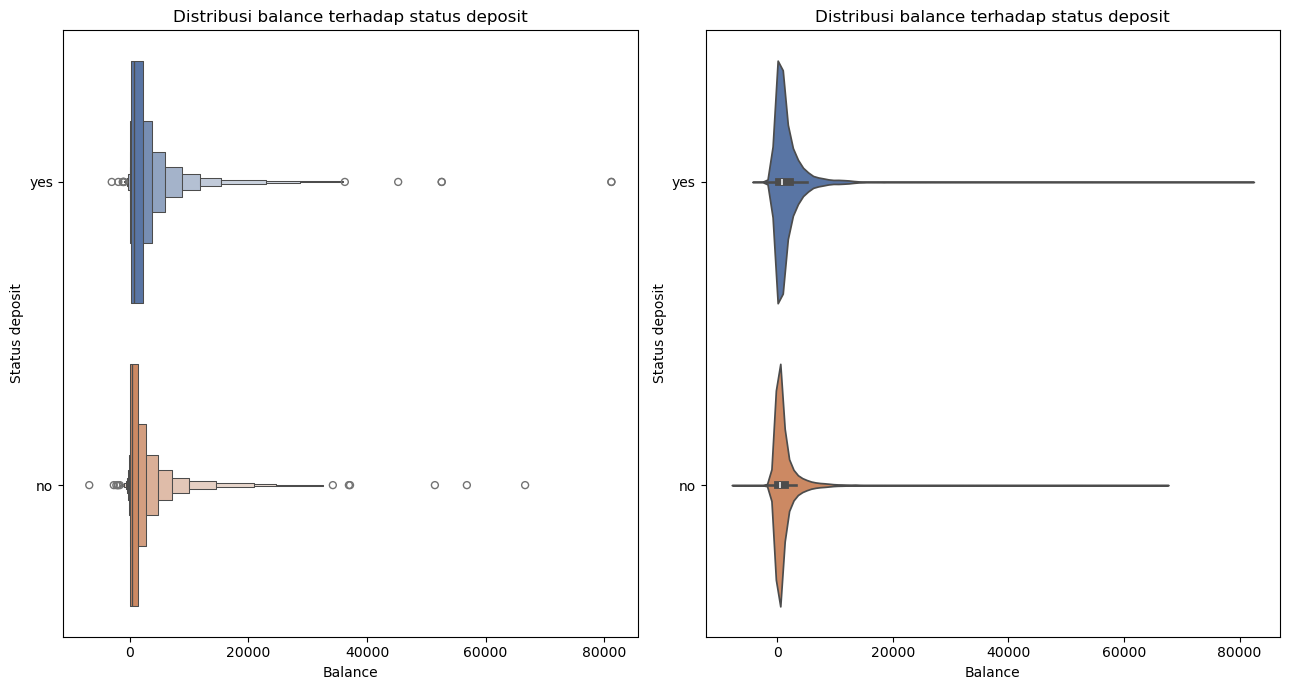

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(13, 7))
# Membuat boxenplot
sns.boxenplot(data=dfeda, x='balance', y='deposit', ax=axs[0], palette='deep')
axs[0].set_title(f'Distribusi balance terhadap status deposit')
axs[0].set_xlabel('Balance')
axs[0].set_ylabel('Status deposit')

# Membuat boxplot
sns.violinplot(data=dfeda, x='balance', y='deposit', ax=axs[1], palette='deep')
axs[1].set_title(f'Distribusi balance terhadap status deposit')
axs[1].set_xlabel('Balance')
axs[1].set_ylabel('Status deposit')

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari grafik boxenplot dan violinplot diatas kita dapat mengambil beberapa kesimpulan sebagai berikut :
1. Client yang memutuskan untuk melakukan investasi term deposit cenderung memiliki saldo bank/balance yang lebih besar dibandingkan client yang memutuskan untuk tidak melakukan investasi term deposit

2. Sebanyak 75 % client yang memutuskan untuk melakukan investasi memiliki balance di bawah 20000 euro

3. Terdapat sebagian kecil client (baik yang memutuskan untuk berinvestasi maupun yang tidak) yang memiliki balance dibawah 0. Balance dibawah 0 memiliki arti bahwa client tersebut memiliki hutang kepada bank. Hutang tersebut dapat muncul pada kasus - kasus seperti nilai nominal transaksi client yang lebih besar dibandingkan nilai nominal credit limitnya

#### Nilai median balance client berdasarkan pekerjaannya

C:\Users\Fiqih\AppData\Local\Temp\ipykernel_20128\2191171645.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jobBalance = pd.DataFrame(dfeda.groupby('job')['balance'].median())
C:\Users\Fiqih\AppData\Local\Temp\ipykernel_20128\2191171645.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=jobBalance, x='job', y='balance',palette='deep', errorbar=None)


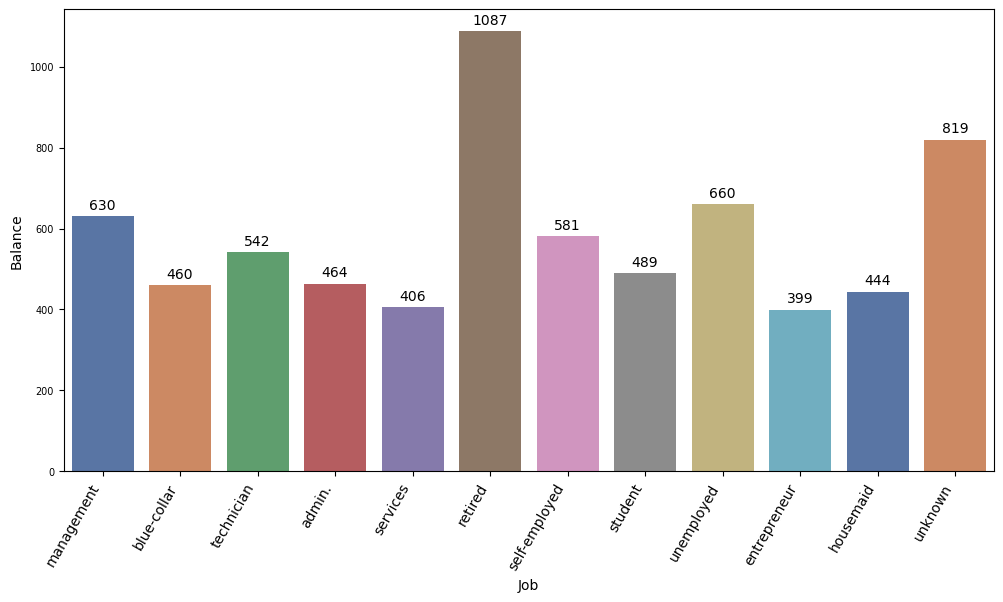

In [26]:
# Membuat dataframe 
jobBalance = pd.DataFrame(dfeda.groupby('job')['balance'].median())

# Membuat figure barplot
plt.figure(figsize=(12,6))
ax = sns.barplot(data=jobBalance, x='job', y='balance',palette='deep', errorbar=None)

# Menampilkan nilai pada masing - masing barplot
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')

# Menampilkan title y dan x axis
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.yticks(fontsize=7)
plt.xlabel('Job')
plt.ylabel('Balance')
plt.show()

Dari grafik barplot di atas kita dapat mengambil beberapa insight sebagai berikut :
1. Nilai median balance terbesar berasal dari kelompok client dengan status pensiun (1087 euro), lalu diikuti dengan client yang memiliki pekerjaan yang belum diketahui (819 euro), client dengan status pekerjaan unemployed (660 euro), dan client yang memiliki pekerjaan (status) management (630 euro). Ini artinya client - clinet dari 3 kelompok tersebut memiliki nilai balance yang cenderung lebih besar dibandingkan client - client dari kelompok lainnya.

2. Pada analisis sebelumnya kita telah mengetahui bahwa kelompok student, retired, dan unemployed memiliki conversion rate terbesar. Asumsi yang dipakai dalam membuat grafik ini adalah semakin besar balance maka semakin besar kemungkinan kelompok tersebut menerima tawaran untuk melakukan investasi (conversion rate tinggi). Jika dihubungkan dengan nilai median balance berdasarkan jenis pekerjaan client maka dapat disimpulkan jika hampir tidak ada hubungan positif antara balance dengan conversion rate pada hampir seluruh kelompok client berdasarkan pekerjaannya. Hubungan positif berlaku hanya pada kelompok client yang memiliki status pensiun. Menurut saya, nilai conversion rate lebih bergantung pada kondisi keuangan masa depan dari client, bukan dari nilai balance itu sendiri. Hal ini disebabkan karena client yang memiliki conversion rate tertinggi justru berasal dari client - client yang tidak memiliki pekerjaan aktif dan memiliki nilai balance yang tidak terlalu tinggi (kecuali kelompok retired), atau dapat dikatakan client - client tersebut tidak memiliki kondisi keuangan yang dapat diprediksi di masa depan karena tidak memiliki sumber active incomes

***Catatan :***
Nilai median lebih dipertimbangkan untuk menggambarkan nilai balance dari suatu kelompok dibandingkan nilai mean dengan alasan antisipasi pada data yang tidak berdistribusi normal


#### Distribusi marital status terhadap status deposit client

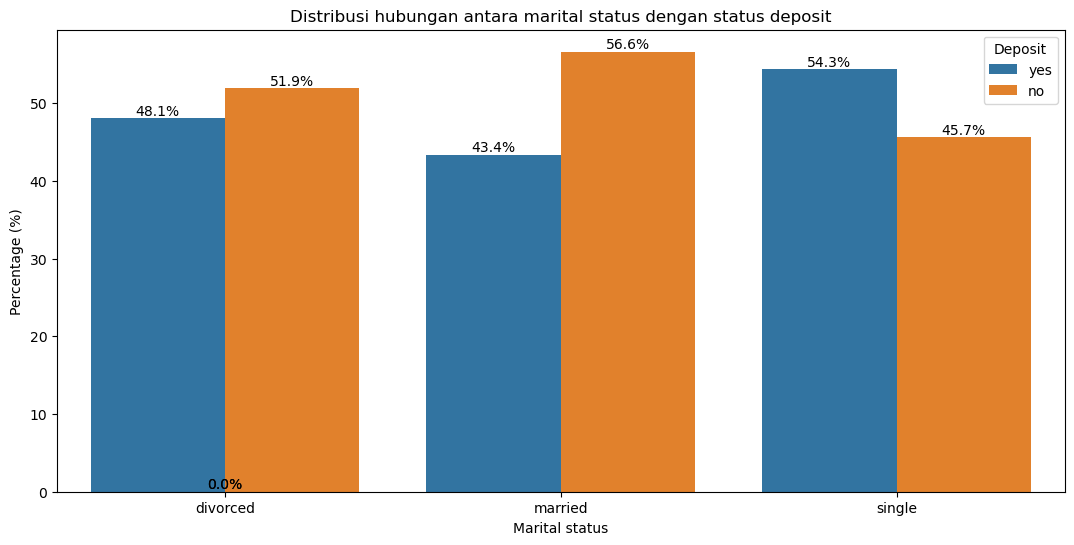

In [27]:
# Menghitung jumlah client yang setuju dan tidak setuju untuk melakukan deposit berdasarkan status marital
cross_tab = pd.crosstab(dfeda['marital'], dfeda['deposit'], normalize='index') * 100
percent_data = cross_tab.reset_index().melt(id_vars='marital', var_name='deposit', value_name='percent').sort_values(by='deposit', ascending=False)

# Membuat grafik barplot
plt.figure(figsize=(13, 6))
ax = sns.barplot(data=percent_data, x='marital', y='percent', hue='deposit')

# Menambahkan label persentase di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=10, color='black')

plt.title('Distribusi hubungan antara marital status dengan status deposit')
plt.xlabel('Marital status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Deposit')
plt.show()


Dari grafik di atas kita dapat mengambil insight sebagai berikut :
1. Client dengan conversion tertinggi berasal dari kelompok yang belum menikah dengan presentase conversion rate sebesar 54.3%, diikuti oleh client yang berasal dari kelompok dengan status bercerai (48.1 %), dan terakhir client yang memiliki status menikah (43.4 %)

2. Pemasaran lebih efektif jika dilakukan pada client dengan status single dibandingkan pada client dengan status menikah. Hal ini kemungkinan terjadi karena pengeluaran uang serta frekuensi transaksi bagi orang yang sudah menikah lebih besar dibandingkan pengeluaran uang serta frekuensi transaksi bagi orang yang belum menikah. Term deposit (deposito berjangka) memiliki ketentuan dimana uang yang diinvestasikan tidak dapat ditarik hingga waktu tertentu yang telah disepakati. Hal ini tentunya menjadi hal yang memberatkan bagi orang - orang yang memiliki pengeluaran besar dan frekuensi transaksi yang tinggi

#### Distribusi loan status (personal dan housing) terhadap status deposit client

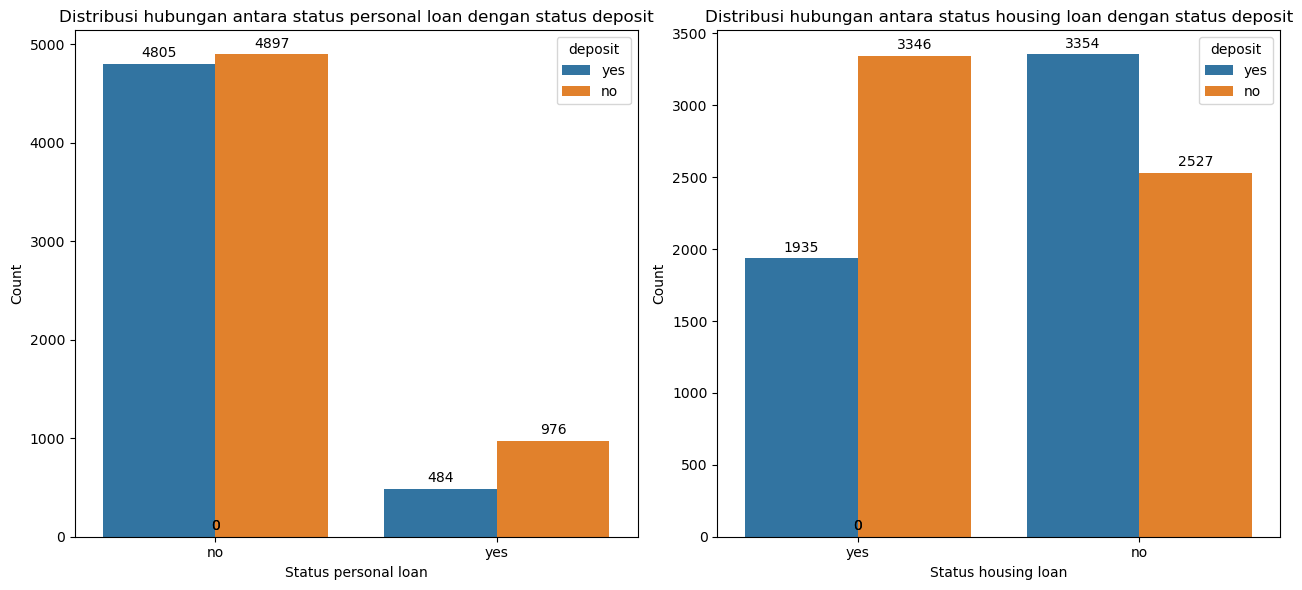

In [28]:
# Membuat grafik countplot dari personal loan
fig, ax = plt.subplots(ncols=2, figsize=(13, 6))
sns.countplot(data=dfeda, x="loan",hue='deposit', ax=ax[0],)

# Looping untuk memberikan nilai pada tiap bar
for p in ax[0].patches:
    height = p.get_height()
    ax[0].annotate(f'{height:.0f}', xy=(p.get_x() + p.get_width() / 2, height),
                   xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Membuat grafik countplot dari housing
sns.countplot(data=dfeda, x="housing",hue='deposit', ax=ax[1])

# Looping untuk memberikan nilai pada tiap bar
for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f'{height:.0f}', xy=(p.get_x() + p.get_width() / 2, height),
                   xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Menampilkan label dan title 
ax[0].set_title('Distribusi hubungan antara status personal loan dengan status deposit')
ax[0].set_xlabel('Status personal loan')
ax[0].set_ylabel('Count')

# Menampilkan label dan title 
ax[1].set_title('Distribusi hubungan antara status housing loan dengan status deposit')
ax[1].set_xlabel('Status housing loan')
ax[1].set_ylabel('Count')


# Menampilkan plot
plt.tight_layout()
plt.show()

Dari data grafik di atas kita dapat menarik kesimpulan sebagai berikut :
1. Dari grafik sebelah kiri, kita dapat melihat jika sebagian besar client yang dihubungi oleh agen pemasaran memiliki status tidak memiliki personal loan. Client yang tidak memiliki personal loan dan menolak untuk berinvestasi jumlahnya sedikit lebih tinggi (4897 orang) dibandingkan client yang memiliki status loan yang sama namun memutuskan untuk melakukan investasi (4805). Artinya tidak ada korelasi positif antara status tidak memiliki personal loan dengan keputusan client dalam melakukan investasi

2. Dari grafik sebelah kanan, kita dapat melihat jika sebagian besar client yang memutuskan untuk melakukan investasi berasal dari kelompok yang tidak memiliki housing loan (3354 orang). Sementara itu, sebagian besar client yang memutuskan untuk tidak melakukan investasi berasal dari kelompok yang memiliki housing loan (3346). Hal ini mengindikasikan bahwa client akan cenderung melakukan investasi term deposit jika mereka tidak memiliki housing loan

# 5. Feature Engineering

### 5.1. Split Train - Test

Pada proses ini, kita akan membagi dataset awal menjadi 2 subdataset. Subdataset pertama merupakan dataset yang digunakan sebagai bahan pembelajaran model (dataset train) yang mana saya akan memberikan proporsi 80 % dari dataset awal. Subdataset kedua merupakan dataset yang digunakan untuk melakukan prediksi (dataset tes) yang mana hasilnya akan digunakan sebagai bahan evaluasi model. Masing - masing subdataset akan dibagi menjadi 2, yaitu feature (x) dan target (y) dimana untuk masing - masing feature dan target akan memiliki jumlah baris yang sama untuk tiap subdatasetnya. Feature akan menjadi variable independent sementara target akan menjadi variable independent yang nilainya dipengatuhi oleh feature.

Kolom yang akan dijadikan target adalah kolom deposit yang nilainya menerangkan status seseorang dalam melakukan investasi deposit term setelah proses campaign. Sementara itu, kolom yang akan dijadikan feature adalah kolom - kolom selain kolom target itu sendiri (age, balance, day, dll).

In [29]:
# Menentukan features dan variable target
x = df.drop('deposit',axis=1)
y = df['deposit']

# Membuat data training dan test menggunakan fungsi train_test_split()
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=50)

In [30]:
# Cek hasil xtrain
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8929 entries, 1576 to 5600
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8929 non-null   int64 
 1   job        8929 non-null   object
 2   marital    8929 non-null   object
 3   education  8929 non-null   object
 4   default    8929 non-null   object
 5   balance    8929 non-null   int64 
 6   housing    8929 non-null   object
 7   loan       8929 non-null   object
 8   contact    8929 non-null   object
 9   day        8929 non-null   int64 
 10  month      8929 non-null   object
 11  duration   8929 non-null   int64 
 12  campaign   8929 non-null   int64 
 13  pdays      8929 non-null   int64 
 14  previous   8929 non-null   int64 
 15  poutcome   8929 non-null   object
dtypes: int64(7), object(9)
memory usage: 1.2+ MB


In [31]:
# Cek hasil ytrain
ytrain.info()

<class 'pandas.core.series.Series'>
Index: 8929 entries, 1576 to 5600
Series name: deposit
Non-Null Count  Dtype 
--------------  ----- 
8929 non-null   object
dtypes: object(1)
memory usage: 139.5+ KB


In [32]:
# Cek hasil xtest
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 2415 to 8961
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        2233 non-null   int64 
 1   job        2233 non-null   object
 2   marital    2233 non-null   object
 3   education  2233 non-null   object
 4   default    2233 non-null   object
 5   balance    2233 non-null   int64 
 6   housing    2233 non-null   object
 7   loan       2233 non-null   object
 8   contact    2233 non-null   object
 9   day        2233 non-null   int64 
 10  month      2233 non-null   object
 11  duration   2233 non-null   int64 
 12  campaign   2233 non-null   int64 
 13  pdays      2233 non-null   int64 
 14  previous   2233 non-null   int64 
 15  poutcome   2233 non-null   object
dtypes: int64(7), object(9)
memory usage: 296.6+ KB


In [33]:
# Cek hasil ytest
ytest.info()

<class 'pandas.core.series.Series'>
Index: 2233 entries, 2415 to 8961
Series name: deposit
Non-Null Count  Dtype 
--------------  ----- 
2233 non-null   object
dtypes: object(1)
memory usage: 34.9+ KB


Dari hasil pengecekan di atas kita dapat mengetahui :
1. Jumlah baris xtrain dan ytrain adalah 8929
2. Jumlah baris xtest dan ytest adalah 2233

### 5.2. Handling Missing Values

Seperti yang sudah kite ketahui, hasil pengecekan missing values pada bab data loading menerangkan bahwa tidak ada missing values pada seluruh kolom. Namun kita akan tetap melakukan pengecekan ulang pada tiap dataset train dan dataset test.

In [34]:
# Cek missing values pada dataset train
print(f'Missing values xtrain = {xtrain.isna().sum().sum()}')
print(f'Missing values ytrain = {ytrain.isna().sum().sum()}')

Missing values xtrain = 0
Missing values ytrain = 0


In [35]:
# Cek missing values pada dataset test
print(f'Missing values xtest = {xtest.isna().sum().sum()}')
print(f'Missing values ytest = {ytest.isna().sum().sum()}')

Missing values xtest = 0
Missing values ytest = 0


Dari hasil di atas dapat kita lihat jika tidak ada missing values pada kedua dataset tersebut sehingga proses handling tidak akan dilakukan.

### 5.3. Handling Outliers

Proses ini bertujuan untuk menangani outliers atau nilai ekstrim pada masing - masing kolom (kecuali target). Outliers sebenarnya dapat dibiarkan atau ditangani. Keputusan tersebut harus berdasarkan pertimbangan sebagai berikut : 

1. Jika outliers disebabkan oleh suatu hal yang kesalahan yang tidak disengaja, technical error, atau error yang terjadi karena pengukuran maka outliers ditangani karena kemungkinan nilai outliers tidak akan muncul secara natural
2. Jika model  dibuat untuk memprediksi kasus - kasus ekstrim seperti penipuan atau kondisi yang tidak stabil, maka outliers dibiarkan 
3. Jika nilai ekstrim tersebut di dunia nyata memang memiliki korelasi dengan target dan dianggap penting secara domain bisnis, maka outliers dapat dibiarkan

Outliers sendiri dapat ditangani dengan 3 metode sebagai berikut :
1. Trimming
    Menghapus outlier dari dataset. Metode ini biasanya digunakan pada non natural outlier (technical error, meassurment error, dll) dan digunakan jika dataset yang kita miliki sangat besar
2. Capping
    Nilai outliers akan diubah menjadi sedekat mungkin dengan nilai upper bond dan lower bond. Metode ini digunakan jika kita ingin size dataset tidak berubah dan hasil prediksi model mendekati keadaan realnya dimana anomali dapat muncul sewaktu - waktu
3. Menjadikan outlier sebagai missing values
    Outliers yang dijadikan sebagai missing values dapat ditangani dengan metode imputasi

Pada proses ini, saya memilih metode capping untuk melakukan handling outliers. Alasannya adalah, saya ingin model yang dibuat dapat menghasilkan hasil prediksi yang dapat merepresentasikan keadaan real dimana natural outliers dapat terjadi sewaktu - waktu, namun disamping itu saya juga ingin agar hasil prediksi tidak menjadi bias karena adanya outliers.

Sebelum melakukan capping, kita akan mengecek terlebih dahulu presentase outlier pada masing - masing feature.

In [36]:
# Membuat list penampung kolom
numcol = xtrain.select_dtypes(exclude='object').columns.tolist()

# Cek hasil
print(f'List of numeric columns : {numcol}')

List of numeric columns : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [37]:
# Membuat variable list penampung nama kolom dan persen outliers
columns = []
percentOutliers = []

# Membuat fungsi untuk menghitung presentase outliers
def outlier(x, variable) :
    q1 = x[variable].quantile(0.25)
    q3 = x[variable].quantile(0.75)
    iqr = q3-q1

    up_bound = q3 + 1.5*iqr
    low_bound = q1 - 1.5*iqr

    outlier = x[variable][(x[variable]<low_bound) | (x[variable]>up_bound)]
    percent = len(outlier)*100/len(x[variable])
    percentOutliers.append(percent)
    columns.append(variable)

for col in numcol :
    outlier(xtrain,col)

# Membuat dataframe outliers
outliersTable = pd.DataFrame([columns,percentOutliers]).T
outliersTable.rename(columns={0 : 'Columns', 1 : 'Percent Outliers'},inplace=True)

In [38]:
# Menampilkan dataframe persen outliers
outliersTable.sort_values(by='Percent Outliers')

,Columns,Percent Outliers
2,day,0.0
0,age,1.545526
4,campaign,5.431739
3,duration,5.577332
1,balance,9.362751
6,previous,11.076268
5,pdays,24.806809


Dari table di atas dapat terlihat jika 5 dari 7 kolom memiliki outliers di atas 5 %. Outliers dengan jumlah terbanyak berasal dari kolom pdays dengan presentase outliers sebanyak 24.8 %, diikuti dengan kolom previous (11 %), dan kolom balance (9.36 %). Dengan jumlah outliers sebanyak itu maka tidak mungkin outliers dihapus karena dapat mengurangi besarnya dataset secara signifikan. Selain itu, outliers tersebut juga tidak mungkin dibiarkan begitu saja karena jumlahnya yang terlalu besar dapat membuat prediksi model menjadi biass. Oleh karena itu menurut saya sudah tepat jika penanganan outliers dilakukan dengan metode capping.

Metode capping akan dibagi menjadi 2 jenis yaitu metode capping gaussian untuk data - data terdistribusi normal dan metode capping iqr untuk data - data terdistribusi skewed. Metode iqr akan dibagi menjadi 2 jenis berdasarkan pengali iqr nya (fold untuk menentukan seberapa besar batas atas dan bawah), yaitu fold = 1.5 untuk moderate skew (0.5 < skewness <= 1) dan fold = 3 untuk high skew (skewness > 1).

In [39]:
# Membuat list penampung normal data dan normal columns
normalcol = []
normaldat = []

# Membuat list penampung skewed data dan skewed columns
skewmoderate = []
skewhigh = []
skewdat = []

# Looping untuk memfilter kolom dengan distribusi normal, moderate skewed, dan high skewed
for col in numcol :
    skewness = xtrain[col].skew()
    
    if (-0.5 <= skewness <= 0.5) :
        normalcol.append(col)
        normaldat.append([col,skewness])
    elif ((skewness >=-1) and (skewness <= -0.5)) or ((skewness <=1) and (skewness > 0.5)) :
        skewmoderate.append(col)
        skewdat.append([col,skewness,'Moderate'])
    elif (skewness < -1) or (skewness > 1) :
        skewhigh.append(col)
        skewdat.append([col,skewness,'High'])


In [40]:
# Cek hasil normal distribution
normaldat = pd.DataFrame(data=normaldat,columns=['Feature', 'Skewness'])
normaldat

,Feature,Skewness
0,day,0.114692


In [41]:
# Cek hasil skewed distribution
skewdat = pd.DataFrame(data=skewdat,columns=['Feature', 'Skewness','Magnitude'])
skewdat

,Feature,Skewness,Magnitude
0,age,0.859449,Moderate
1,balance,8.671820,High
2,duration,2.042277,High
3,campaign,5.511671,High
4,pdays,2.506531,High
5,previous,5.825968,High


Dari hasil perhitungan skewness di atas dapat terlihat jika hanya ada 1 kolom yang memiliki distribusi normal (day) dan ada 6 kolom yang memiliki distribusi skewed. Selanjutnya kita akan masuk ke proses capping dimana kolom - kolom tersebut akan dicapping berdasarkan jenis distribusinya.

In [42]:
# Membuat object dan melakukan proses capping pada kolom berdistribusi normal yang berada di dalam xtrain-xtest 
wins_normal = Winsorizer(capping_method = 'gaussian',
                         tail = 'both',
                         fold = 3,
                         variables = normalcol,
                         missing_values = 'ignore')

# Proses capping kolom berdistribusi normal
xtrain_capped = wins_normal.fit_transform(xtrain)
xtest_capped = wins_normal.transform(xtest)

In [43]:
# Membuat object dan melakukan proses capping pada kolom berdistribusi high skewed yang berada di dalam xtrain-xtest 
wins_skew = Winsorizer(capping_method='iqr',
                       tail = 'both',
                       fold = 1.5,
                       variables = skewmoderate,
                       missing_values = 'ignore')
xtrain_capped = wins_skew.fit_transform(xtrain)
xtest_capped = wins_skew.transform(xtest)

In [44]:
# Membuat object dan melakukan proses capping pada kolom berdistribusi high skewed yang berada di dalam xtrain-xtest 
wins_skew = Winsorizer(capping_method='iqr',
                       tail = 'both',
                       fold = 3,
                       variables = skewhigh,
                       missing_values = 'ignore')
xtrain_capped = wins_skew.fit_transform(xtrain)
xtest_capped = wins_skew.transform(xtest)

Setelah proses capping, kita akan melakukan pengecekan ulang presentase outliers dari tiap kolom.

In [45]:
# Looping fungsi untuk menghitung presentase outliers
percentOutliers = []
for col in numcol :
    outlier(xtrain_capped,col)

# Membuat dataframe outliers
outliersTable['Percent outliers after capping'] = percentOutliers

# Cek hasil
outliersTable

,Columns,Percent Outliers,Percent outliers after capping
0,age,1.545526,1.545526
1,balance,9.362751,9.362751
2,day,0.0,0.000000
3,duration,5.577332,5.577332
4,campaign,5.431739,5.431739
5,pdays,24.806809,24.806809
6,previous,11.076268,11.076268


Dari table di atas dapat terlihat jika presentase outliers pada seluruh kolom numerik antara sebelum dan sesudah capping nilainya tidak berkurang. Kemungkinan besar ini disebabkan karena nilai outliers yang dicapping masih berada di atas upper bond atau masih berada di bawah lower bond. Hal ini normal karena proses capping sendiri hanya mengurangi nilai outliers hingga mendekati atau sama dengan nilai upper serta lower bondnya. Selanjutnya untuk memastikan keberhasilan proses capping, kita akan melakukan analisa visual dengan cara membuat grafik distribusi data serta grafik boxplot.

In [46]:
# Membuat fungsi untuk menampilkan grafik
def outlierhandling(before, after, num):

    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{num} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(xtrain[num], bins=30, ax=axes[0, 0])
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=xtrain[num], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(xtrain_capped[num], bins=30, ax=axes[0, 1])
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=xtrain_capped[num], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

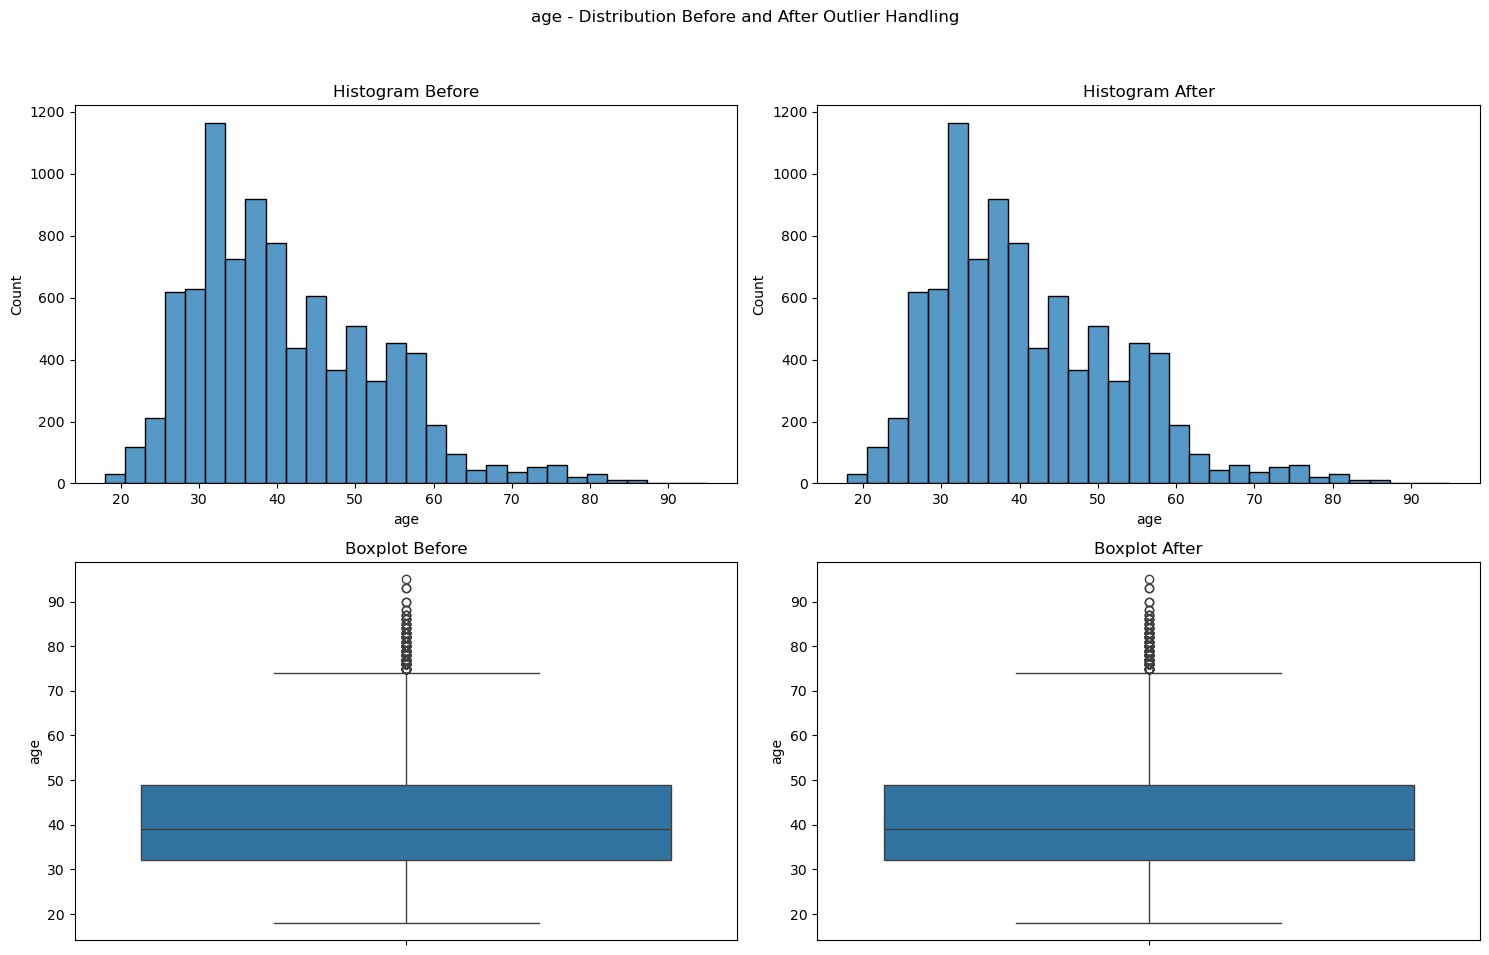

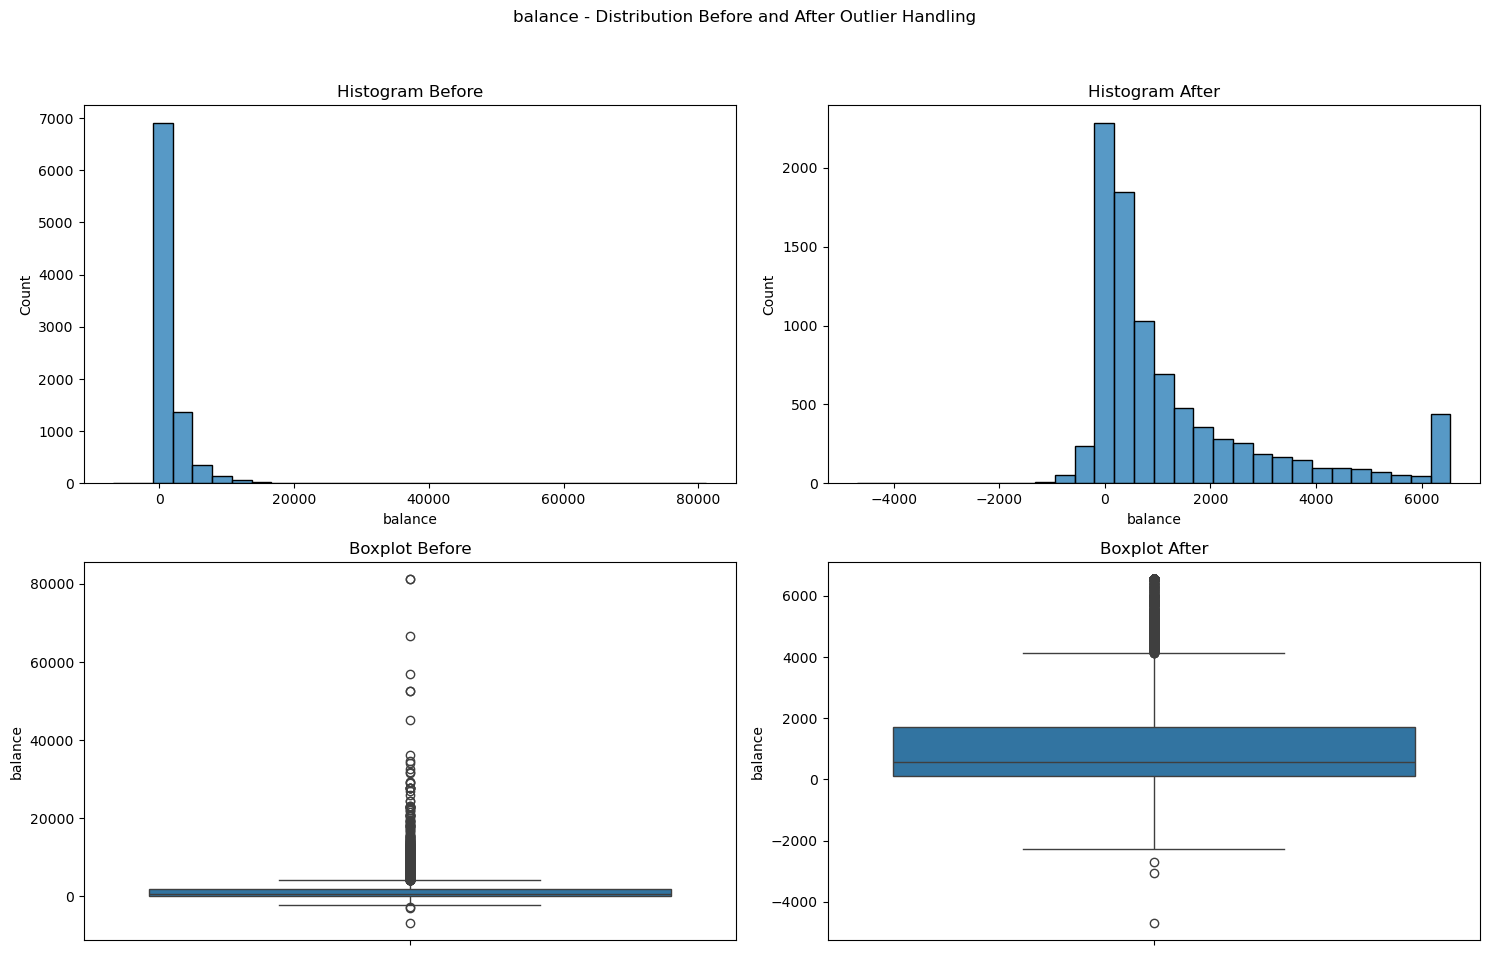

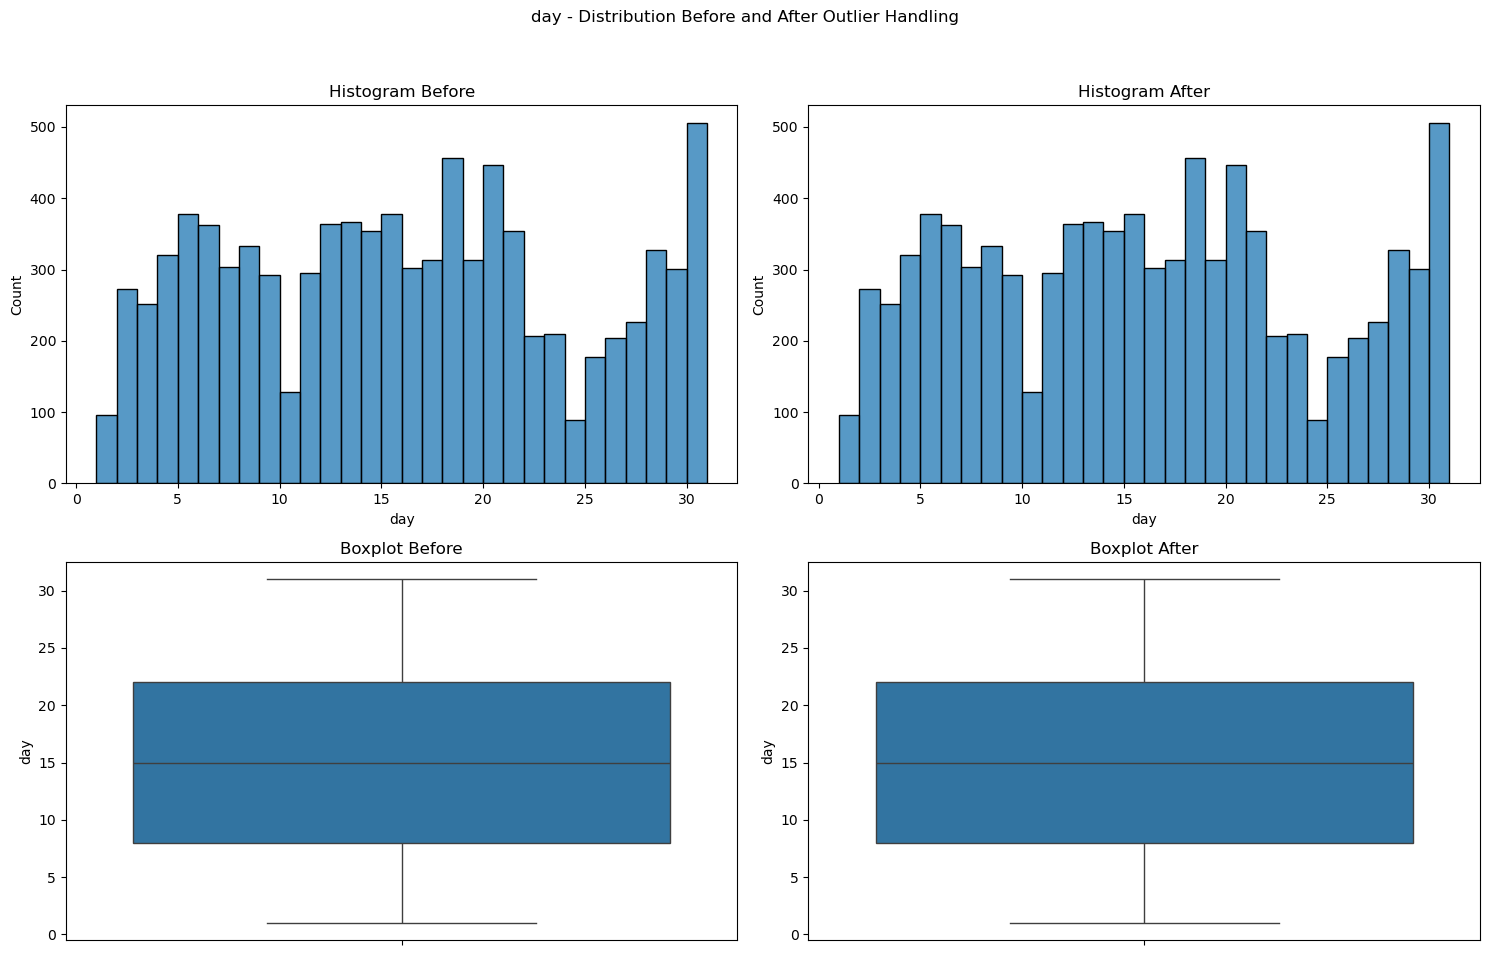

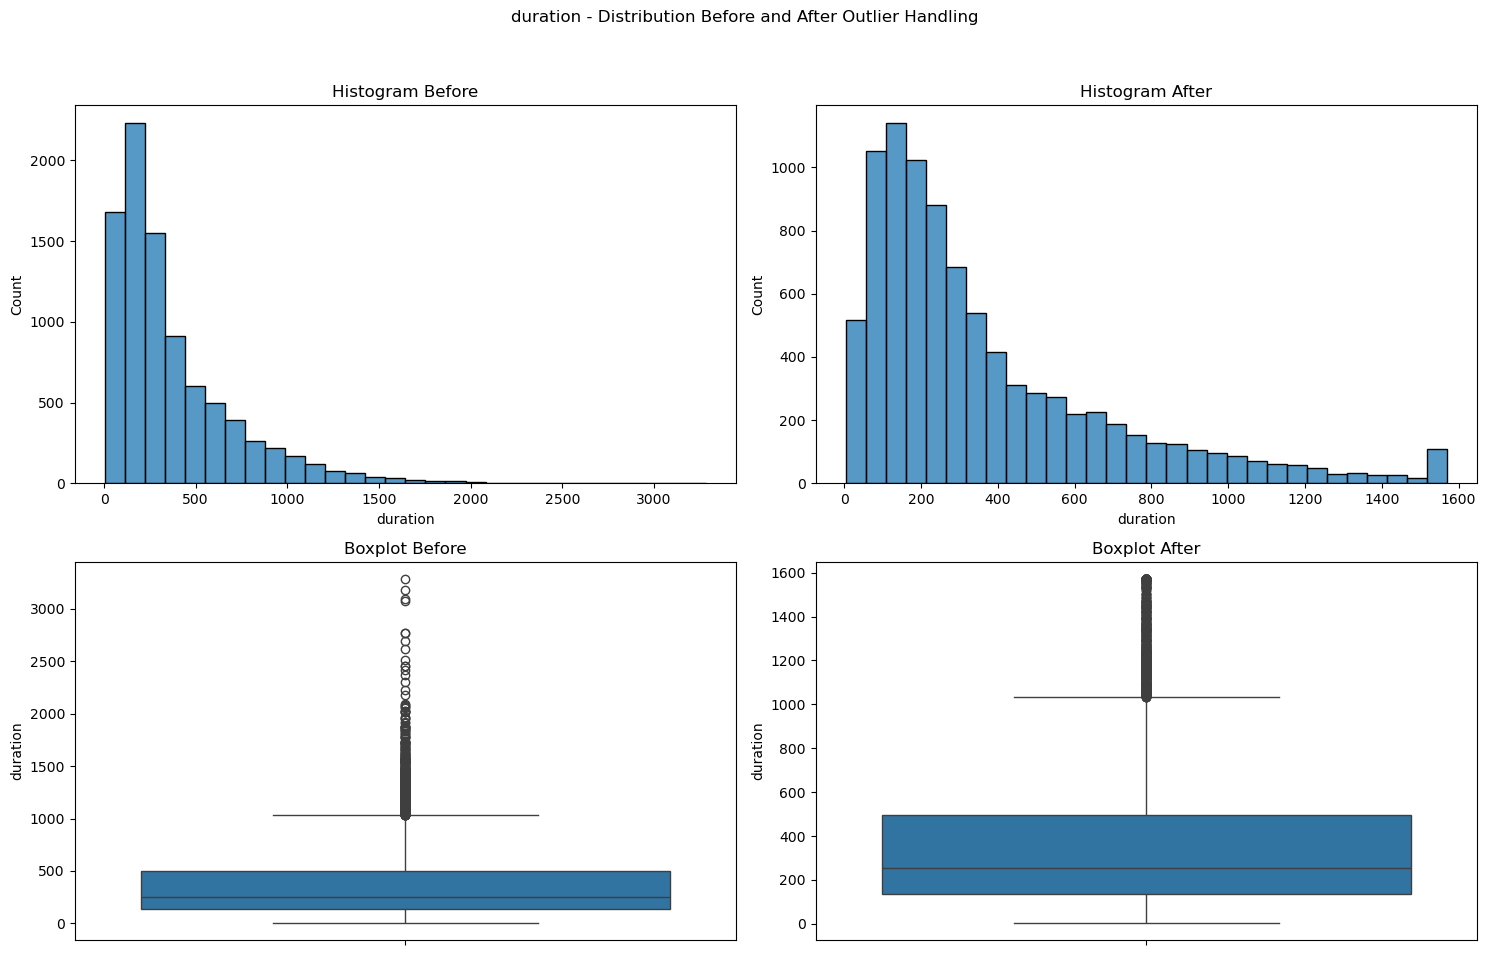

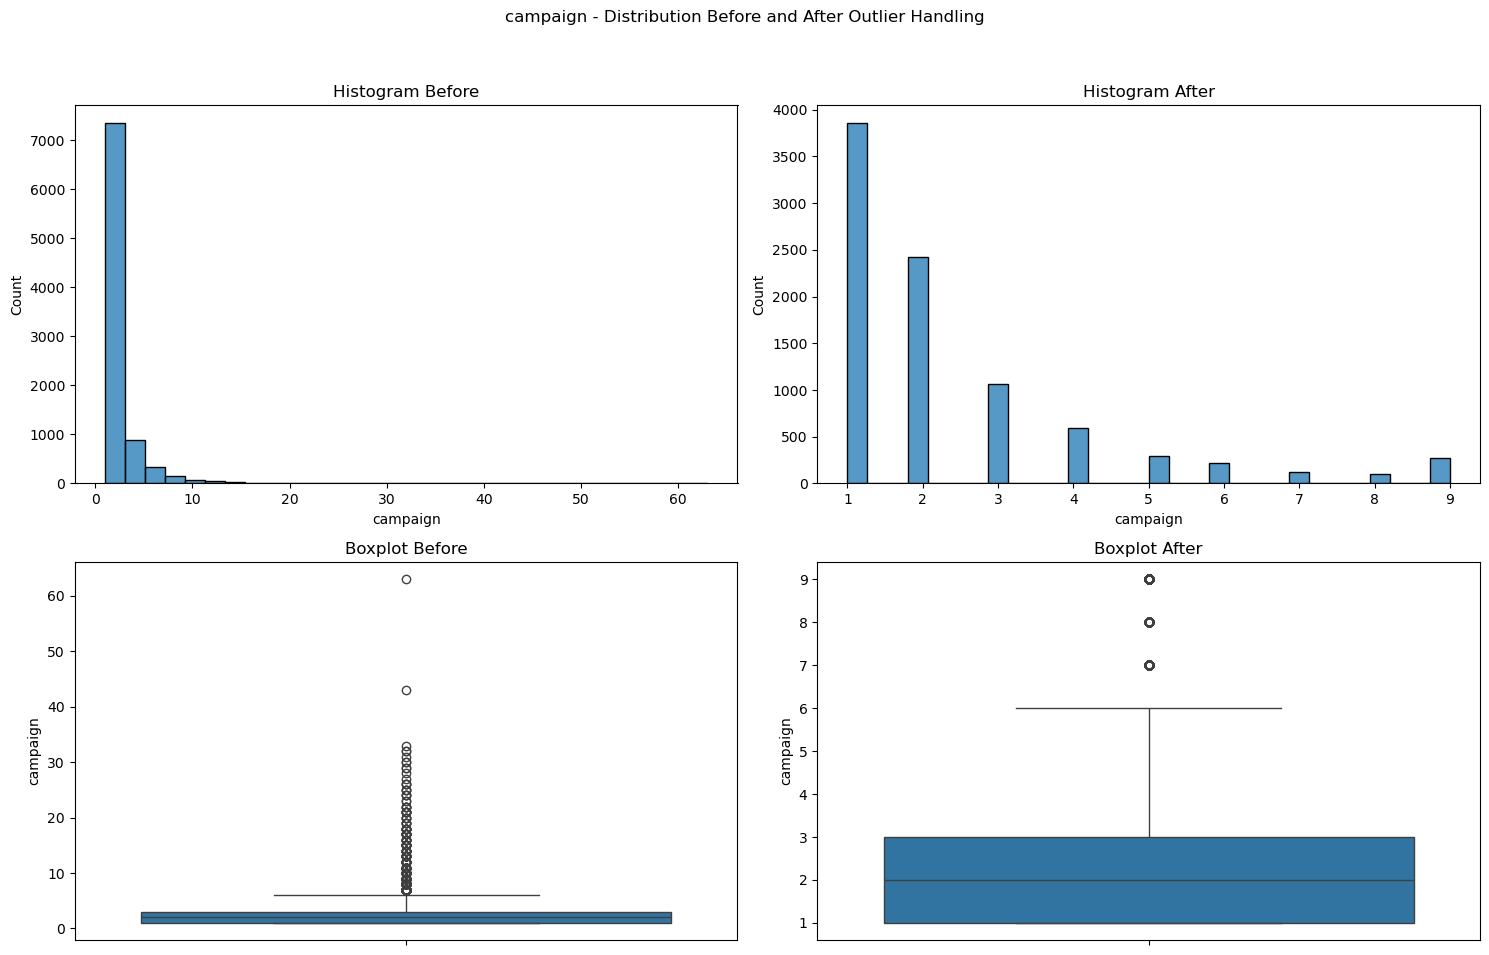

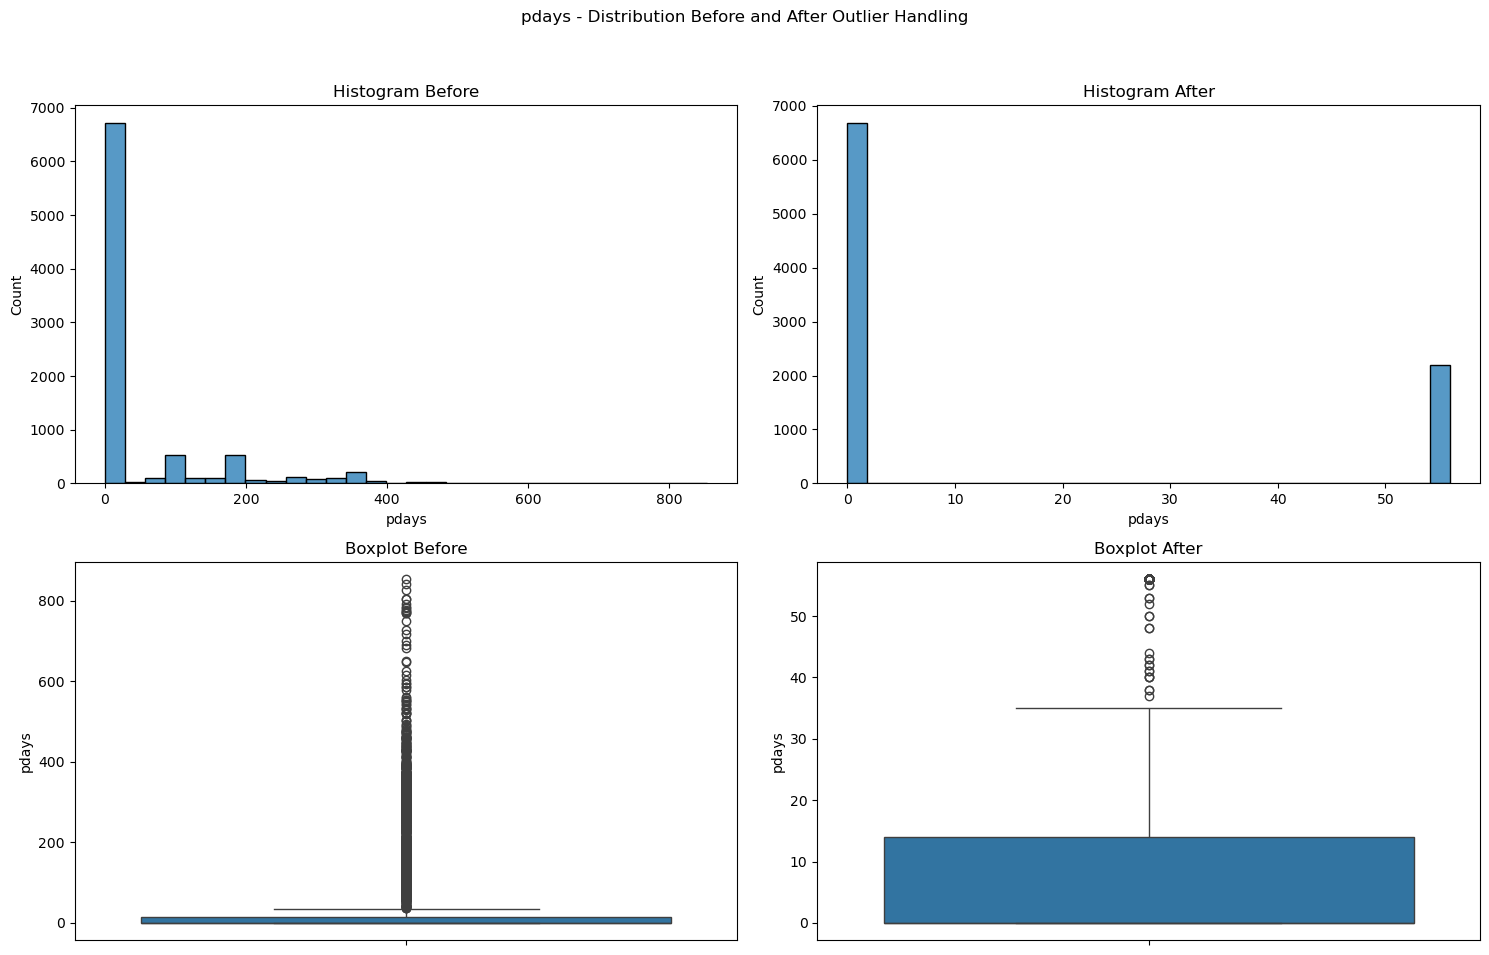

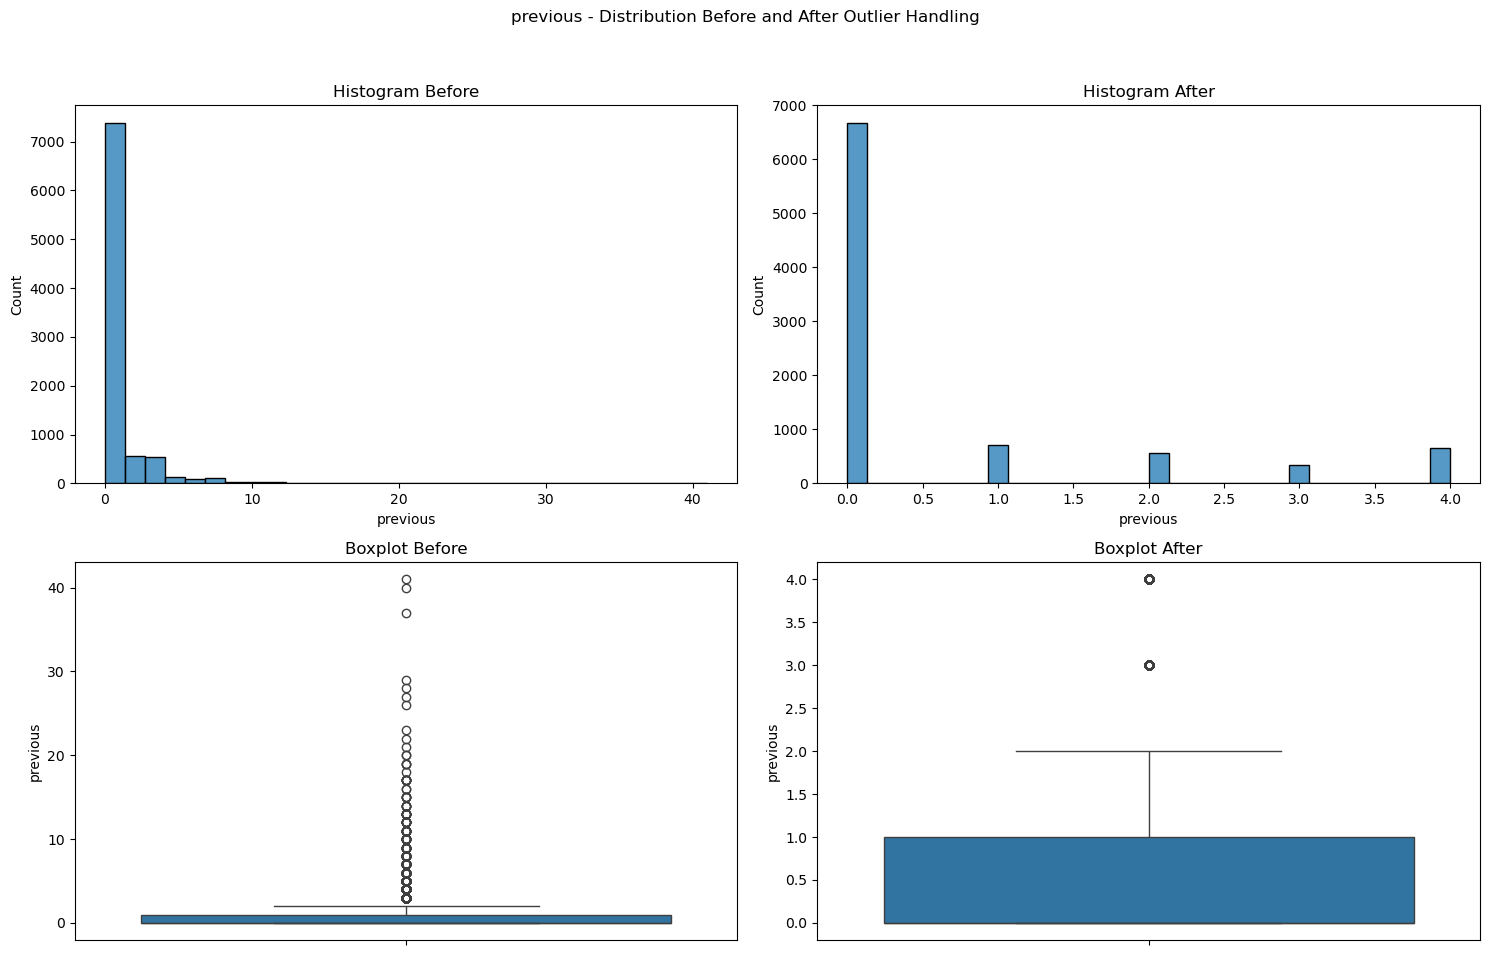

In [47]:
# Looping untuk memanggil fungsi outlierhandling
for i in numcol :
    outlierhandling(xtrain, xtrain_capped, i)

Dari grafik di atas kita dapat melihat bahwa tidak seluruh kolom nilai outliers nya berhasil dikurangi. Kolom - kolom yang nilai outliersnya berhasil dikurangi adalah kolom balance, duration, campaign, pdays, dan previous. Sementara itu, proses capping tampaknya tidak berhasil dilakukan pada kolom age dan day karena distribusi dari kedua kolom tersebut tidak berubah.

***Catatan :***
Kolom day memiliki presentase outliers 0 % sehingga wajar jika proses capping tidak merubah distribusi data pada kolom tersebut

### 5.4. Feature Selection

Proses ini dilakukan untuk menyeleksi kolom - kolom agar dapat dijadikan sebagai feature. Kolom - kolom yang akan dijadikan sebagai feature harus memiliki ciri - ciri sebagai berikut :

1. Berdasarkan business domain (pemasaran investasi term deposit) dan knowledge kolom tersebut memang pernah mempengaruhi target atau kolom tersebut memang memiliki kemungkinan untuk mempengaruhi target

2. Lolos uji korelasi

   Artinya kolom harus memiliki korelasi dengan target, jika tidak memiliki korelasi model akan memiliki performa yang buruk dan akurasi prediksinya menjadi buruk

3. Low cardinality

   Cardinality akan membawa dampak negatif yang cukup besar terhadap performa dan kecepatan model jika feature - feature kategorik yang ada bertipe nominal. Feature - feature yang ememiliki high cardinality dapat menyebabkan ledakan dimensi terutama ketika kita menggunakan one hot encoder. Selain itu high cardinality juga dapat membawa dampak yang cukup besar pada proporsi pembagian nilai unique value dari suatu feature dimana unique value kemungkinan besar muncul hanya di salah satu dataset namun tidak di dataset yang lain, hal ini dapat menyebabkan kasus overfitting.


#### 5.4.1. Uji Korelasi

Tujuan dari uji korelasi adalah untuk melihat ada tidaknya korelasi dan seberapa mungkin terjadinya korelasi tersebut (signifikan atau tidak signifikan) berdasarkan koefisien korelasi dan p value. Sebelum menjalani uji korelasi, beberapa hal harus saya terangkan :

1. Nilai koefisien korelasi menggambarkan seberapa kuat hubungan antara independent variable (kolom) dengan target. Nilai koefisien yang berada pada rentang 0 <= koefisien <= 0.1 memiliki arti hubungan yang sangat lemah atau tidak ada hubungan sama sekali, nilai korelasi 0.1 < koefisien <= 4 memiliki arti hubungan yang lemah, nilai korelasi 0.4 < koefisien <= 6 memiliki arti hubungan yang sedang, dan nilai korelasi 0.6 < koefisien <= 8 memiliki arti hubungan yang kuat, dan nilai korelasi 0.8 < koefisien <= 1 memiliki arti hubungan yang sangat kuat. "Dari hasil visualisasi scaterrplot antara target dengan beberapa kolom (pada bagian EDA), terlihat bahwa dari seluruh kolom yang divisualisasikan, tidak ada kolom yang menunjukan adanya hubungan korelasi sedang atau kuat. Dari hasil tersebut maka akan ditetapkan hanya ada 2 kategori korelasi yaitu tidak berkorelasi (koefisien <= 0.1) dan berkorelasi (koefisien > 0.1)"

2. Nilai P value menggambarkan seberapa mungkin (probabilitas) mendapatkan nilai hasil perhitungan korelasi "secara kebetulan". 

3. Hipotesis akan dibagi menjadi 2, yaitu : 
   - Hipotesis 0 : Nilai korelasi didapatkan karena kebetulan
   - Hipotesis 1 : Nilai korelasi didapatkan bukan karena kebetulan

4. Nilai alfa (a)/signfikansi adalah nilai batas untuk menentukan apakah hipotesis H0 diterima atau ditolak (terima hipotesis H1). Nilai alfa pada umumnya memiliki nilai 0.05. Artinya, jika P value > 0.05 maka nilai korelasi yang didapatkan merupakan kebetulan semata dan presentase mendapatkan nilai yang sama secara kebetulan sebesar %P value. Jika nilai P value < a, maka nilai korelasi yang didapatkan bukan karena kebetulan (tolak H0, terima H1) karena presentase mendapatkan nilai tersebut secara kebetulan berada di bawah 5%

5. Pada proses ini, kita akan membagi uji korelasi menjadi 2 jenis, yaitu uji korelasi data kategorik dan uji korelasi data numerik. Uji korelasi data kategorik akan menggunakan metode Kendall. Uji korelasi data numerik akan dibagi menjadi 2 jenis, yaitu uji yang menggunakan metode Pearson dan uji korelasi yang menggunakan metode Spearman. Uji korelasi Pearson diperuntukan untuk data - data yang terdistribusi normal (skewness <= 0.5) sementara uji korelasi Spearman diperuntukan untuk data - data yang terdistribusi tidak normal/skewed (skewness > 0.5)

6. Dari nilai koefisien dan P value maka hasil akan dibagi menjadi 4 :
   Kategori 1 : Tidak ada korelasi, H0 ditolak
      * P value < 0.05 dan 0 <= koefisien <= 0.1      : Tidak ada korelasi, H0 ditolak       -> Probabilitas mendapatkan hasil seperti ini secara kebetulan di bawah 5%
      * P value < 0.05 dan -0.1 <= koefisien <= 0     : Tidak ada korelasi, H0 ditolak       -> Probabilitas mendapatkan hasil seperti ini secara kebetulan di bawah 5%
   
   Kategori 2 : Tidak ada korelasi, H0 diterima
      * P value > 0.05 dan 0 <= koefisien <= 0.1      : Tidak ada korelasi, H0 diterima      -> Probabilitas mendapatkan hasil seperti ini secara kebetulan di atas 5%
      * P value > 0.05 dan -0.1 <= koefisien <= 0     : Tidak ada korelasi, H0 diterima      -> Probabilitas mendapatkan hasil seperti ini secara kebetulan di atas 5%
   
   Kategori 3 : Terdapat korelasi, H0 ditolak
      * P value < 0.05 dan koefisien > 0.1            : Korelasi positif, H0 ditolak         -> Probabilitas mendapatkan hasil seperti ini secara kebetulan di bawah 5%
      * P value < 0.05 dan koefisien < -0.1           : Korelasi negatif, H0 ditolak         -> Probabilitas mendapatkan hasil seperti ini secara kebetulan di bawah 5%
   
   Kategori 4 : Terdapat korelasi, H0 diterima
      * P value > 0.05 dan koefisien > 0.1            : Korelasi positif, H0 diterima        -> Probabilitas mendapatkan hasil seperti ini secara kebetulan di atas 5%
      * P value > 0.05 dan koefisien < -0.1           : Korelasi negatif, H0 diterima        -> Probabilitas mendapatkan hasil seperti ini secara kebetulan di atas 5%


   Dari ke - 4 kategori tersebut, kolom yang akan kita jadikan feature adalah kolom - kolom yang mendapatkan kategori 3 yaitu "Terdapat korelasi baik positif maupun negatif dimana probabilitas untuk mendapatkan hasil yang sama secara kebetulan adalah dibawah 5%". Hal ini dilakukan karena kolom - kolom yang akan dijadikan sebagai feature harus benar - benar memiliki korelasi dan kondisi tersebut didapatkan bukan karena kebetulan semata.

In [48]:
# Membuat list data numerik dan data kategorik
numcol = xtrain.select_dtypes(exclude = 'object').columns.tolist()
catcol = xtrain.select_dtypes(include = 'object').columns.tolist()

# Cek hasil
print('Numerical Columns: ', numcol)
print('Categorical Columns: ', catcol)

Numerical Columns:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [49]:
# Membuat dataframe kategorikal dan numerikal
xtrainnum = xtrain_capped[numcol]
xtraincat = xtrain_capped[catcol]

# Cek hasil kolom - kolom numerikal
xtrainnum.head()

,age,balance,day,duration,campaign,pdays,previous
1576,24,597,20,943,3,0,0
6392,59,2291,14,127,3,0,0
7341,35,557,17,54,4,0,0
5211,37,604,7,371,1,56,1
9353,32,628,30,280,1,0,0


In [50]:
# Cek hasil kolom - kolom kategorikal
xtraincat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
1576,student,single,secondary,no,yes,no,cellular,apr,unknown
6392,retired,married,secondary,no,no,yes,cellular,jul,unknown
7341,admin.,married,secondary,no,yes,no,cellular,jun,unknown
5211,blue-collar,married,secondary,no,yes,no,cellular,oct,failure
9353,management,married,tertiary,no,no,no,cellular,apr,unknown


##### Uji korelasi kolom kategorik

Pada uji korelasi ini kita akan menggunakan uji korelasi Kendall karena tipe data kolom yang bersifat kategorik (ordinal maupun nominal).

In [51]:
# Membuat list penampung nilai p value, nilai coefficient, magnitude, nama kolom, dan selected column
p_val = []
coef_val = []
magnitude = []
col_name = []
selected_cat = []

# Looping untuk uji korelasi Kendall
for col in xtraincat.columns :
    corr_tau, pval = stats.kendalltau(xtraincat[col], ytrain)
    
    # Memasukan hasil nilai uji kedalam list
    p_val.append(round(pval,4))
    coef_val.append(round(corr_tau,4))
    col_name.append(col)

    # Filtering hasil uji korelasi
    if (pval < 0.05) and (corr_tau > 0.1) :
        magnitude.append('Korelasi positif, H0 ditolak')
        selected_cat.append(col)
    elif (pval < 0.05) and (corr_tau < -0.1) :
        magnitude.append('Korelasi negatif, H0 ditolak')
        selected_cat.append(col)
    elif (pval > 0.05) and (corr_tau > 0.1) :
        magnitude.append('Korelasi positif, H0 diterima')
    elif (pval > 0.05) and (corr_tau < -0.1) :
        magnitude.append('Korelasi negatif, H0 diterima')
    elif (pval > 0.05) and ((corr_tau < 0.1) and (corr_tau >= 0)) :
        magnitude.append('Tidak ada korelasi, H0 diterima')
    elif (pval > 0.05) and ((corr_tau > -0.1) and (corr_tau <= 0)) :
        magnitude.append('Tidak ada korelasi, H0 diterima')
    elif (pval < 0.05) and ((corr_tau < 0.1) and (corr_tau >= 0)) :
        magnitude.append('Tidak ada korelasi, H0 ditolak')
    elif (pval < 0.05) and ((corr_tau > -0.1) and (corr_tau <= 0)) :
        magnitude.append('Tidak ada korelasi, H0 ditolak')



# Membuat dataframe hasil uji korelasi
ujikorelasi = pd.DataFrame({'Column' : col_name, 'Tau coefficient' : coef_val, 'P value' : p_val, 'Magnitude' : magnitude})

# Cek hasil
ujikorelasi.sort_values(by='P value')

,Column,Tau coefficient,P value,Magnitude
0,job,0.0671,0.0000,"Tidak ada korelasi, H0 ditolak"
1,marital,0.0671,0.0000,"Tidak ada korelasi, H0 ditolak"
2,education,0.0988,0.0000,"Tidak ada korelasi, H0 ditolak"
4,housing,-0.2076,0.0000,"Korelasi negatif, H0 ditolak"
5,loan,-0.1115,0.0000,"Korelasi negatif, H0 ditolak"
6,contact,-0.2292,0.0000,"Korelasi negatif, H0 ditolak"
8,poutcome,-0.1952,0.0000,"Korelasi negatif, H0 ditolak"
3,default,-0.0389,0.0002,"Tidak ada korelasi, H0 ditolak"
7,month,-0.0253,0.0059,"Tidak ada korelasi, H0 ditolak"


Dari table di atas dapat terlihat jika dari 8 kolom yang dilakukan uji, hanya 4 kolom yang lolos uji korelasi (housing, loan, contact, dan poutcome) dimana nilai koefisiennya lebih dari 0.1 dan P valuenya kurang dari 0.05. 

In [52]:
# Cek selected column
print(selected_cat)

['housing', 'loan', 'contact', 'poutcome']


##### Uji korelasi kolom numerik

Uji korelasi ini dikhususkan untuk kolom - kolom yang memiliki tipe data numerik. Proses ini menggunakan 2 metode korelasi yaitu metode Person untuk kolom - kolom yang nilainya terdistribusi secara normal dan metode Spearman untuk kolom - kolom yang nilainya tidak terdistribusi normal.

***Catatan :***
Karena pada metode pearson tidak bisa menggunakan tipe data kategorik dan untuk menghindari masalah yang sama ketika menjalankan model, maka nilai "yes" dan "no" pada target (ytrain dan ytest) akan diganti. Nilai 'yes' akan diganti menjadi 1 sementara nilai 'no' akan diganti menjadi 0

In [53]:
# Merubah nilai ytrain dari object ke numerik
ytrain = ytrain.replace('yes',1)
ytrain = ytrain.replace('no',0)

# Merubah nilai ytest dari object ke numerik
ytest = ytest.replace('yes',1)
ytest = ytest.replace('no',0)

In [54]:
# Membuat list penampung nilai p value, nilai coefficient, magnitude, nama kolom, dan selected column
p_val = []
coef_val = []
magnitude = []
col_name = []
selected_num = []
corr = []
distribution = []

# Looping untuk uji korelasi Pearson (normal distribution)
for col in xtrainnum.columns :
    # if statement untuk filtering kolom dengan distribusi normal
    if abs(xtrainnum[col].skew()) < 0.5 :
        corr_r, pval_r = stats.pearsonr(xtrainnum[col], ytrain)
    
        # Memasukan hasil nilai uji kedalam list
        p_val.append(round(pval_r,4))
        coef_val.append(round(corr_r,4))
        col_name.append(col)
        corr.append('Pearson')
        distribution.append('Normal')

        # Filtering hasil uji korelasi
        if (pval_r < 0.05) and (corr_r > 0.1) :
            magnitude.append('Korelasi positif, H0 ditolak')
            selected_num.append(col)
        elif (pval_r < 0.05) and (corr_r < -0.1) :
            magnitude.append('Korelasi negatif, H0 ditolak')
            selected_num.append(col)
        elif (pval_r > 0.05) and (corr_r > 0.1) :
            magnitude.append('Korelasi positif, H0 diterima')
        elif (pval_r > 0.05) and (corr_r < -0.1) :
            magnitude.append('Korelasi negatif, H0 diterima')
        elif (pval_r > 0.05) and ((corr_r <= 0.1) and (corr_r >= 0)) :
            magnitude.append('Tidak ada korelasi, H0 diterima')
        elif (pval_r > 0.05) and ((corr_r >= -0.1) and (corr_r <= 0)) :
            magnitude.append('Tidak ada korelasi, H0 diterima')
        elif (pval_r < 0.05) and ((corr_r <= 0.1) and (corr_r >= 0)) :
            magnitude.append('Tidak ada korelasi, H0 ditolak')
        elif (pval_r < 0.05) and ((corr_r >= -0.1) and (corr_r <= 0)) :
            magnitude.append('Tidak ada korelasi, H0 ditolak')



    # else statement untuk filtering kolom dengan distribusi skewed
    else:
        corr_rho, pval_s = stats.spearmanr(xtrainnum[col], ytrain)
    
        # Memasukan hasil nilai uji kedalam list
        p_val.append(round(pval_s,4))
        coef_val.append(round(corr_rho,4))
        col_name.append(col)
        corr.append('Spearman')
        distribution.append('Skewed')

        # Filtering hasil uji korelasi
        if (pval_s < 0.05) and (corr_rho > 0.1) :
            magnitude.append('Korelasi positif, H0 ditolak')
            selected_num.append(col)
        elif (pval_s < 0.05) and (corr_rho < -0.1) :
            magnitude.append('Korelasi negatif, H0 ditolak')
            selected_num.append(col)
        elif (pval_s > 0.05) and (corr_rho > 0.1) :
            magnitude.append('Korelasi positif, H0 diterima')
            selected_num.append(col)
        elif (pval_s > 0.05) and (corr_rho < -0.1) :
            magnitude.append('Korelasi negatif, H0 diterima')
            selected_num.append(col)
        elif (pval_s > 0.05) and ((corr_rho <= 0.1) and (corr_rho >= 0)) :
            magnitude.append('Tidak ada korelasi, H0 diterima')
        elif (pval_s > 0.05) and ((corr_rho >= -0.1) and (corr_rho <= 0)) :
            magnitude.append('Tidak ada korelasi, H0 diterima')
        elif (pval_s < 0.05) and ((corr_rho <= 0.1) and (corr_rho >= 0)) :
            magnitude.append('Tidak ada korelasi, H0 ditolak')
        elif (pval_s < 0.05) and ((corr_rho >= -0.1) and (corr_rho <= 0)) :
            magnitude.append('Tidak ada korelasi, H0 ditolak')

# Membuat dataframe hasil uji korelasi
ujikorelasi_num = pd.DataFrame({'Column' : col_name, 'Distribusi' : distribution,'Korelasi' : corr, 'Coefficient' : coef_val, 'P value' : p_val, 'Magnitude' : magnitude})

# Cek hasil
ujikorelasi_num.sort_values(by='P value')

,Column,Distribusi,Korelasi,Coefficient,P value,Magnitude
1,balance,Skewed,Spearman,0.1622,0.0000,"Korelasi positif, H0 ditolak"
2,day,Normal,Pearson,-0.0575,0.0000,"Tidak ada korelasi, H0 ditolak"
3,duration,Skewed,Spearman,0.5268,0.0000,"Korelasi positif, H0 ditolak"
4,campaign,Skewed,Spearman,-0.1344,0.0000,"Korelasi negatif, H0 ditolak"
5,pdays,Skewed,Spearman,0.2342,0.0000,"Korelasi positif, H0 ditolak"
6,previous,Skewed,Spearman,0.2332,0.0000,"Korelasi positif, H0 ditolak"
0,age,Skewed,Spearman,-0.0072,0.4979,"Tidak ada korelasi, H0 diterima"


Dari table di atas dapat terlihat jika 5 dari 7 kolom lolos uji korelasi dimana nilai koefisiennya lebih dari 1 dan nilai P valuenya kurang dari 0.05. Kolom - kolom yang lolos tersebut selanjutnya akan dijadikan feature atau variable independent pada proses klasifikasi. Feature - feature tersebut selanjutnya akan dicek sifat multicollinearitynya menggunakan VIF score.

In [55]:
# Selceted numerical column
selected_num

['balance', 'duration', 'campaign', 'pdays', 'previous']

### 5.4.2. Cardinality

In [56]:
# Looping untuk melihat jumlah unique values pada kolom kategorik
numUnique = []
for i in selected_cat :
    numUnique.append(xtraincat[i].nunique())


In [57]:
# Buat dataframe
cardinality = pd.DataFrame()
cardinality['Kolom kategorik'] = selected_cat
cardinality['Jumlah unique values'] = numUnique

# Cek hasil
cardinality

,Kolom kategorik,Jumlah unique values
0,housing,2
1,loan,2
2,contact,3
3,poutcome,4


Jika feature memiliki lebih dari 50 unique values maka akan kita anggap feature tersebut memiliki cardinality yang cukup tinggi dan feature tersebut harus didrop dari dataset. Karena hasil pengecekan cardinality di atas menunjukan jika feature - feature kategorik memiliki nilai unique values di bawah 50, maka dapat kita simpulkan jika kita tidak memiliki masalah cardinality.

### 5.4.3. Membuat dataset final

In [58]:
# Membuat list final columns
finalColumns = selected_cat + selected_num

# Membuat dataset train final
xtrainfinal = xtrain[finalColumns]

# Update kolom dataframe test
xtestfinal = xtest_capped[finalColumns]

# Cek hasil dataset train
xtrainfinal

,housing,loan,contact,poutcome,balance,duration,campaign,pdays,previous
1576,yes,no,cellular,unknown,597,943,3,0,0
6392,no,yes,cellular,unknown,2291,127,3,0,0
7341,yes,no,cellular,unknown,557,54,4,0,0
5211,yes,no,cellular,failure,604,371,1,495,1
9353,no,no,cellular,unknown,628,280,1,0,0
...,...,...,...,...,...,...,...,...,...
8324,yes,no,cellular,unknown,28,368,1,0,0
10206,yes,no,cellular,unknown,-287,580,4,0,0
6253,yes,no,unknown,unknown,229,197,1,0,0
10123,no,no,cellular,unknown,3196,10,2,0,0


In [59]:
# Cek hasil dataset test
xtestfinal

,housing,loan,contact,poutcome,balance,duration,campaign,pdays,previous
2415,no,no,cellular,unknown,1240,849,1,0,0
9356,yes,no,unknown,unknown,2278,152,2,0,0
3673,yes,no,cellular,unknown,674,267,1,0,0
9303,yes,no,cellular,unknown,417,476,2,0,0
4011,yes,no,cellular,unknown,2376,395,1,0,0
...,...,...,...,...,...,...,...,...,...
146,yes,no,unknown,unknown,685,896,3,0,0
5916,yes,no,cellular,unknown,499,338,1,0,0
5583,yes,no,cellular,unknown,-375,61,2,0,0
10448,no,no,cellular,unknown,179,294,3,0,0


### 5.4.4. Feature Scaling

Proses ini bertujuan untuk menyamakan skala nilai dari feature bertipe data numerik. Penyamaan skala diperlukan agar tidak ada feature yang mendominasi perhitungan model karena skala nilainya yang terlalu besar dibandingkan skala nilai feature numerik lain. Jika salah satu feature nilai - nilainya mendominasi perhitungan dibandingkan nilai - nilai feature lain, maka besar kemungkinan prediksi model akan menjadi bias karena prediksi model sebagian besar dipengaruhi oelh nilai - nilai yang jauh lebih besar dibandingkan nilai - nilai lainnya.

Terdapat 3 metode scaling, yaitu :

1. MinMax Scaler
   Digunakan untuk data yang tidak memiliki distribusi normal. Kekurangan dari metode ini adalah bahwa metode ini sensitif terhadap outliers

2. Standard Scaler
   Digunakan untuk data yang memiliki distribusi normal. Kekurangan dari metode ini adalah bahwa metode ini sensitif terhadap outliers dan tidak cocok terhadap data berdistribusi skewed

3. Robust Scaler
   Digunakan untuk data yang memiliki banyak outlier karena metode ini hanya menggunakan IQR dan median untuk melakukan scaling. Kekurangan dari metode ini adalah bahwa metode ini mengabaikan mean dalam perhitungannya (karena mean sensitif terhadap outliers)

Sebelum melakukan scaling, kita akan melakukan pengecekan terhadap outliers dan skewness dari masing - masing feature numerik. Walaupun sebelumnya kita telah melakukan proses capping outliers dan pengecekan skewness, namun kedua proses tersebut tidak merepresentasikan hasil setelah capping. Hal ini bertujuan agar kita tidak salah dalam memilih metode scaling dan agar dapat memilih metode yang sesuai dengan keadaan data feature.

In [60]:
# Membuat variable list penampung nama kolom dan persen outliers
columns = []
percentOutliers = []
skewness = []

# Membuat fungsi untuk menghitung presentase outliers
def outlier(x, variable) :
    q1 = x[variable].quantile(0.25)
    q3 = x[variable].quantile(0.75)
    iqr = q3-q1

    up_bound = q3 + 1.5*iqr
    low_bound = q1 - 1.5*iqr

    outlier = x[variable][(x[variable]<low_bound) | (x[variable]>up_bound)]
    percent = len(outlier)*100/len(x[variable])
    skewness.append(x[variable].skew())
    percentOutliers.append(percent)
    columns.append(variable)

for col in xtrainnum :
    outlier(xtrainnum,col)

# Membuat dataframe outliers
table = pd.DataFrame([columns,percentOutliers,skewness]).T
table.rename(columns={0 : 'Columns', 1 : 'Percent Outliers', 2: 'Skewness'},inplace=True)

In [61]:
# Cek hasil
table

,Columns,Percent Outliers,Skewness
0,age,1.545526,0.859449
1,balance,9.362751,1.699748
2,day,0.0,0.114692
3,duration,5.577332,1.578037
4,campaign,5.431739,1.941701
5,pdays,24.806809,1.162608
6,previous,11.076268,1.890423


Dari table di atas kita dapat melihat bahwa seluruh feature memiliki skewness yang cukup tinggi (high skewed) dengan outliers di atas 5 %. Oleh karena itu, scaling akan kita lakukan menggunakan robust scaler.

In [62]:
# Membuat object scaler
scaler = RobustScaler()
scaler

RobustScaler()

### 5.4.5. Feature Encoding

In [63]:
# Cek dataframe kategorik
xtraincat

,job,marital,education,default,housing,loan,contact,month,poutcome
1576,student,single,secondary,no,yes,no,cellular,apr,unknown
6392,retired,married,secondary,no,no,yes,cellular,jul,unknown
7341,admin.,married,secondary,no,yes,no,cellular,jun,unknown
5211,blue-collar,married,secondary,no,yes,no,cellular,oct,failure
9353,management,married,tertiary,no,no,no,cellular,apr,unknown
...,...,...,...,...,...,...,...,...,...
8324,technician,single,secondary,no,yes,no,cellular,nov,unknown
10206,services,divorced,secondary,no,yes,no,cellular,apr,unknown
6253,management,married,tertiary,no,yes,no,unknown,may,unknown
10123,management,single,unknown,no,no,no,cellular,feb,unknown


Dari data table di atas dapat terlihat jika seluruh feature kategorik memiliki tipe data ordinal. Oleh karena itu, pada proses encoding ini kita akan menggunakan ordinal encoder.

In [64]:
# Membuat object encoder
encoder = OrdinalEncoder()
encoder


OrdinalEncoder()

# 6. Model Definition

Pembuatan model akan melalui beberapa tahap sebagai berikut :
1. Pembuatan column transformer
2. Pengintegrasian model pada pipline
3. Prediksi dan evaluasi default model
4. Cross validation
5. Hyperparameter tuning
6. Perbandingan model default dengan model yang menggunakan hyperparameter hasil tuning

Pada tahap 1 hingga tahap 4, kita akan menjalankan 5 model pada mode defaultnya (hyperparameter default). Tahap 4 menjadi tahap dimana model terbaik (sesuai matriksnya) akan dipilih untuk kemudian dioptimasi melalui proses hyperparameter tuning. 5 model yang akan kita jalankan adalah sebegai berikut :

1. KNN
    Model ini menggunakan jarak terdekat antara point target dengan point - point dari kelas tertentu untuk melakukan klasifikasi. Model ini menggunakan hyperparameter 'K' yang menentukan berapa banyak point - point terdekat yang akan digunakan untuk melakukan klasifikasi berdasarkan jarak. Model ini tidak menggunakan asumsi distribusi normal pada data, sehingga sangat cocok untuk data yang tidak berdistribusi normal (skewed) seperti data yang kita miliki. Hal yang perlu diperhatikan adalah, karena KNN menggunakan jarak untuk melakukan klasifikasi, maka model ini sangat sensitif terhadap outliers. Sama seperti logistic linear, jumlah outlier pada data kita perlu dijadikan pertimbangan ketika melakukan seleksi model

2. SVM
    Model yang memanfaatkan decisions boundary line/hyperplane untuk melakukan klasifikasi. Hyperplane adalah baris yang dapat memisahkan 2 atau lebih kelas berdasarkan support vectornya (point kelas terdekat dengan hyperplane). Model ini dapat melakukan kelasifikasi pada data yang memiliki hubungan linear atau non linear antar dependent dan independent variablenya. Jika hubungannya non linear, maka model ini akan menggunakan kernel untuk membuat hyperplanenya. Ada 3 jenis kernel yang paling sering digunakan pada model ini yaitu RBF, Polynomial, Sigmoid, dan Linear dimana pada mode defaultnya model ini menggunakan kernel RBF.

3. Decission Tree
    Adalah model yang melakukan proses klasifikasi berdasarkan decision rule yang mirip seperti conditional statement. Decision rule tersebut disebut sebagai decision node dimana setiap decision node akan bercabang menjadi decision node yang lain atau menjadi leaf node. Leaf node sendiri merupakan output akhir dari suatu decision node yang memiliki variansi values terendah (diwakili dengan nilai gini). Sederhananya, model ini bekerja dengan cara membuat beberapa node conditional statement dimana conditional statement tersebut dibuat berdasarkan karakteristik tertentu dari nilai suatu feature.

4. Random Forest
    Adalah salah satu model yang bekerja menggunakan algoritma bagging. Bagging adalah algoritma yang bekerja menggunakan beberapa model untuk melakukan prediksi dimana masing - masing model akan bekerja secara paralel menggunakan subset - subset data yang ada. Subset data yang dimaksud disini adalah hasil resampling dataset dimana setiap subset data akan memiliki jumlah sample yang sama seperti dataset orginal namun memiliki variansi yang berbeda antar subsetnya. Pada random forest, model - model yang digunakan adalah decision tree, jadi dapat dikatakan bahwa random forest adalah model yang bekerja menggunakan lebih dari 1 decision tree dimana seluruh decision tree akan bekerja secara paralel. Karena merupakan salah satu algoritma 

5. XGBoost (Boosting)
    Merupakan salah satu model yang bekerja dengan algoritma boosting. Boosting adalah algortima yang menggunakan beberapa model dimana seluruh model akan bekerja dengan urutan series. Fokus pada boosting adalah untuk mengurangi error/residual yang dihasilkan oleh model - model sebelumnya. XGBoost bekerja menggunakan model decision tree dimana setiap decision tree akan memberikan residualnya (error hasil prediksi) kepada decision tree selanjutnya untuk dijadikan sebagai target prediksi. Seluruh hasil prediksi dari masing - masing model nantinya akan diagregasi menggunakan prinsip weighted sum dimana semakin besar urutan series pada model maka akan semakin tinggi bobot prediksinya (misalkan outputnya nilai kontinyu, maka bobot nya adalah pengali dari nilai tersebut)

    

### 6.1. Column Transformer

Karena kita menggunakan pipeline dalam menjalankan proses training dan predict, maka kita harus membuat object yang dinamakan transformer untuk mengatur proses preprocessing dan melakukan proses transform berdasarkan tipe data featurenya. Singkatnya, transformer memiliki peran untuk mengatur proses feature engineering apa saja yang perlu dilakukan terhadap masing - masing feature berdasarkan karakteristik data feature tersebut.

Pada pembuatan object ini, hanya ada 2 method feature engineering yang akan dimasukan ke dalam object transformer, yaitu scaling dan encoding.

In [65]:
# Making column transformer for preprocessing
transformer = ColumnTransformer([
('scaler', scaler, selected_num),
('encoding', encoder, selected_cat)],
remainder='drop')

### 6.2. Pengintegrasian model pada pipline

#### KNN

In [66]:
# Pembuatan pipeline model KNN
knnPipe = Pipeline([
    ('transformer', transformer),
    ('classifier', KNeighborsClassifier())
])

knnPipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('classifier', KNeighborsClassifier())])

#### SVM

In [67]:
# Pembuatan pipeline model SVM
svmPipe = Pipeline([
    ('transformer', transformer),
    ('classifier', SVC())
])

svmPipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('classifier', SVC())])

#### Decission Tree

In [68]:
# Pembuatan pipeline model decision tree
decissionPipe = Pipeline([
    ('transformer', transformer),
    ('classifier', DecisionTreeClassifier())
])

decissionPipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('classifier', DecisionTreeClassifier())])

#### Random Forest

In [69]:
# Pembuatan pipeline model Random Forest
forestPipe = Pipeline([
    ('transformer', transformer),
    ('classifier', RandomForestClassifier())
])

forestPipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('classifier', RandomForestClassifier())])

#### XGBoost

In [70]:
# Pembuatan pipeline model XGBoost
xgbPipe = Pipeline([
    ('transformer', transformer),
    ('classifier', XGBClassifier())
])

xgbPipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=N...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

# 7. Model Training

In [71]:
# Training model KNN
knnPipe.fit(xtrainfinal,ytrain)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('classifier', KNeighborsClassifier())])

In [72]:
# Training model SVM
svmPipe.fit(xtrainfinal,ytrain)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('classifier', SVC())])

In [73]:
# Training model Decission Tree
decissionPipe.fit(xtrainfinal,ytrain)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('classifier', DecisionTreeClassifier())])

In [74]:
# Training model Random Forest
forestPipe.fit(xtrainfinal,ytrain)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('classifier', RandomForestClassifier())])

In [75]:
# Training model XGBoost
xgbPipe.fit(xtrainfinal,ytrain)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=N...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

# 8. Model Evaluation

Target project ini adalah untuk  untuk meningkatkan efisiensi kegiatan pemasaran team marketing dengan cara pembuatan model yang dapat memprediksi client - client yang memiliki potensi dalam melakukan investasi term deposit. Client yang potensial adalah client yang berdasarkan karakteristiknya (berdasarkan nilai masing - masing feature) memiliki kemungkinan besar untuk menerima tawaran dalam melakukan investasi term deposit setelah proses pemasaran telemarketing. Dengan menggunakan model yang dibangun, maka diharapkan bank dapat meningkatkan efektifitas dan efisiensi kegiatan pemasaran telemarketing dengan cara melakukan filtering terlebih dahulu terhadap data client sehingga client yang dihubungi oleh telemarkerter/agen pemasaran merupakan client yang memang memiliki potensi tinggi (client potensial) untuk melakukan investasi term deposit. Dari uraian tersebut, maka dipilih matriks evaluasi precision karena kita menghindari hasil prediksi false positif yang dapat mengakibatkan upaya pemasaran menjadi sia-sia.

Sebelum memasuki proses evaluasi, ada 2 hal yang harus diterangkan :

1. Terdapat 2 kelas, client yang memutuskan untuk melakukan investasi setelah kegiatan pemasaran atau dapat kita sebut sebagai ***client potensial*** (kelas positive) dan client yang tidak memutuskan untuk tidak melakukan investasi setelah kegiatan pemassaran atau dapat kita sebut sebagai ***client non potensial*** (kelas negatif)

2. Terdapat 4 kemungkinan hasil prediksi :
      
      - True positif             : Dari hasil prediksi client tersebut tergolong dalam ***kelas client potensial*** dan dari data aktualnya clent memang tergolong dalam kelas tersebut
      - False positif            : Dari hasil prediksi client tersebut tergolong dalam ***kelas client potensial*** namun dari data aktualnya client tidak tergolong dalam kelas tersebut
      - True negative            : Dari hasil prediksi client tersebut tergolong dalam ***kelas client non potensial*** dan dari data aktualnya client memang tergolong dalam kelas tersebut
      - False negatif            : Dari hasil prediksi client tersebut tergolong dalam ***kelas client non potensial*** namun dari data aktualnya client tidak tergolong dalam kelas tersebut


Seperti yang sudah dijelaskan sebelumnya, proses evaluasi akan diawali dengan evaluasi hasil prediksi model pada mode default (dengan hyperparameter defaultnya). Setelah itu, masing - masing model akan dilakukan tes cross validation untuk mengetahui seberapa baik model dalam melakukan prediksi pada dataset yang berbeda. Setelah proses cross valdiation maka akan dipilih model terbaik, model terbaik tersebut nantinya akan masuk ke proses hypertuning untuk mencari nilai hyperparameter yang dapat memberikan kinerja optimal pada model.

### 8.1. Default Model Evaluation

Pada tahap ini, hasil prediksi masing - masing model akan divisualisasikan table dan confussion matrixnya. Table model akan memiliki komponen - komponen sebagai berikut :
1. ***Precision train*** atau presisi dalam memprediksi dataset train
2. ***Precision test*** atau presisi dalam memprediksi dataset test
3. ***$ Different of Precision (tes - train)*** atau presentase perbedaan nilai score precision dari hasil prediksi dataset train dan dataset test
4. ***Recall train*** atau score recall dalam memprediksi dataset train
5. ***Recall test*** atau score recalldalam memprediksi dataset test
6. ***Accuracy train*** atau score akurasi dalam memprediksi dataset train
7. ***Accuracy test*** atau score akurasi dalam memprediksi dataset test
8. ***F1 score train*** atau nilai score dalam memprediksi dataset train
9. ***F1 score test*** atau nilai score dalam memprediksi dataset test

Untuk confussion matrix, hanya confussion matrix hasil prediksi dataset test saja yang akan ditampilkan.

In [76]:
# Membuat dataframe penampung nilai matriks evaluasi
matriks = pd.DataFrame({'Matrices' : ['Precision train', 'Precision test','% Different of Precission (Test - Train)', 'Recall train', 'Recall test',
                                      'Accuracy train', 'Accuracy test', 'F1 score train', 'F1 score test']})

# Membuat fungsi untuk menghitung nilai matriks evaluasi
def matrices(ypred_train, ypred_test, modelname) :

    global ytrain, ytest
    
    # Evaluasi dengan precision
    precision_train = round(precision_score(ytrain, ypred_train),3)
    precision_test = round(precision_score(ytest, ypred_test),3)

    # Evaluasi dengan recall
    recall_train = round(recall_score(ytrain, ypred_train),3)
    recall_test = round(recall_score(ytest,ypred_test),3)

    # Evaluasi dengan accuracy
    acuracy_train = round(accuracy_score(ytrain, ypred_train),3)
    acuracy_test = round(accuracy_score(ytest,ypred_test),3)

    # Evaluasi dengan F1 score
    f1train = round(f1_score(ytrain, ypred_train),3)
    f1test = round(f1_score(ytest, ypred_test),3)

    # Evaluasi perbedaan precission antara train dengan test
    precentdifferent = round(((precision_test - precision_train)*100/precision_train),2)

    matriks[modelname] = [precision_train, precision_test, precentdifferent, recall_train, recall_test, acuracy_train, acuracy_test,
                        f1train, f1test]


In [77]:
# Membuat fungis untuk menampilkan dataframe beserta confussion matrix
def confuss(ypred, modelname, matriks) :
    # Membuat figure dan axis
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Menampilkan dataframe 
    ax[0].axis('tight')
    ax[0].axis('off')
    table = ax[0].table(cellText=matriks.loc[:,['Matrices',modelname]].values, colLabels=matriks.loc[:,['Matrices',modelname]].columns, cellLoc='center', loc='center')

    global ytest

    # Menampilkan confusion matrix 
    sns.heatmap(confusion_matrix(ypred, ytest),
                annot=True,
                fmt='g',
                xticklabels=['Not prospect (Negative)', 'Prospect (Positive)'],
                yticklabels=['Not prospect (Negative)', 'Prospect (Positive)'],
                ax=ax[1])
    ax[1].set_title(f'Confusion Matrix - {modelname} (Test)')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Actual')
    plt.tight_layout()
    plt.show()

#### KNN

In [78]:
# Prediksi dataset train dan test
ypred_trainKNN = knnPipe.predict(xtrainfinal)
ypred_testKNN = knnPipe.predict(xtestfinal)

# Menghitung matriks evaluasi
matrices(ypred_trainKNN, ypred_testKNN, 'KNN')

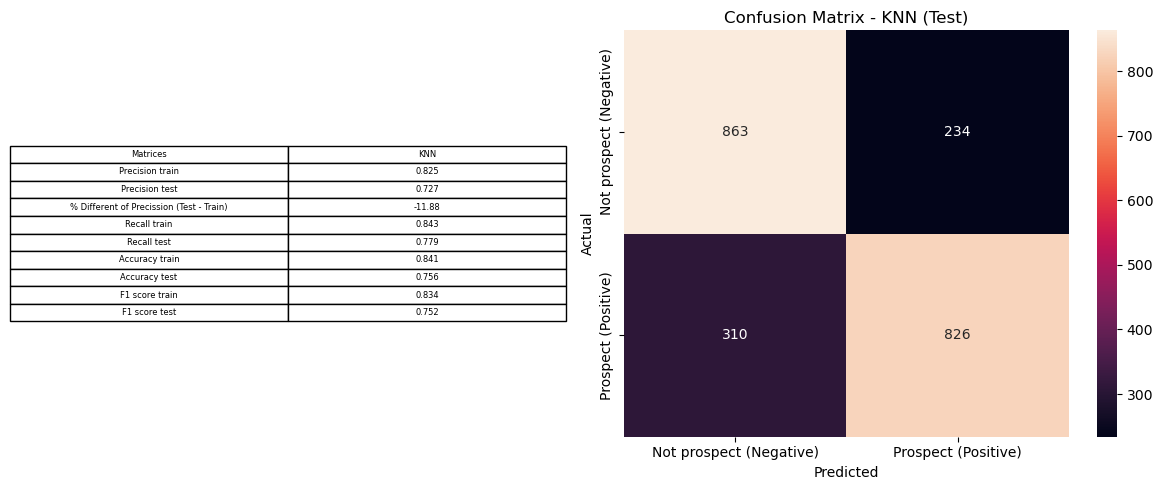

In [79]:
# Menampilkan table nilai evaluasi dan confussion matrix
confuss(ypred_testKNN, 'KNN', matriks)

Dari table dan confussion matrix di atas kita dapat mengambil beberapa kesimpulan :

1. Dilihat dari perbedaan nilai precision antara hasil prediksi dataset train (0.825) dan dataset test (0.727), model ini memiliki perbedaan - 11.88 % yang artinya ***hasil prediksi model bersifat overfitting***. Overfitting yang dihasilkan terbilang memiliki skala yang cukup besar. Pada dataset training, model memiliki tingkat kebenaran sebesar 82.5 % dalam memprediksi client potensial sementara pada dataset test, model KNN memiliki tingkat kebenaran dalam memprediksi client potensial yang lebih rendah yaitu sebesar 72.7 %.

2. Hasil overfitting juga terjadi pada matriks evaluasi recall, accuracy, dan F1 score

3. Dari hasil overfitting pada keempat matriks di atas, maka dapat disimmpulkan bahwa ***model KNN dengan hyperparameter default tidak dapat menggeneralisir data secara baik sehingga ketika melakukan prediksi pada dataset yang berbeda, tingkat kebenaran model menjadi turun***

4. Dari confussion matriks dapat terlihat jika model berhasil memprediksi client - client dengan kelas true positive sebanyak 826 client, sementara 310 client yang secara aktualnya berasal dari kelas true positive diprediksi oleh model sebagai class negatif (hasil prediksi false negative)

#### SVM

In [80]:
# Prediksi dataset train dan test
ypred_trainSVM = svmPipe.predict(xtrainfinal)
ypred_testSVM = svmPipe.predict(xtestfinal)

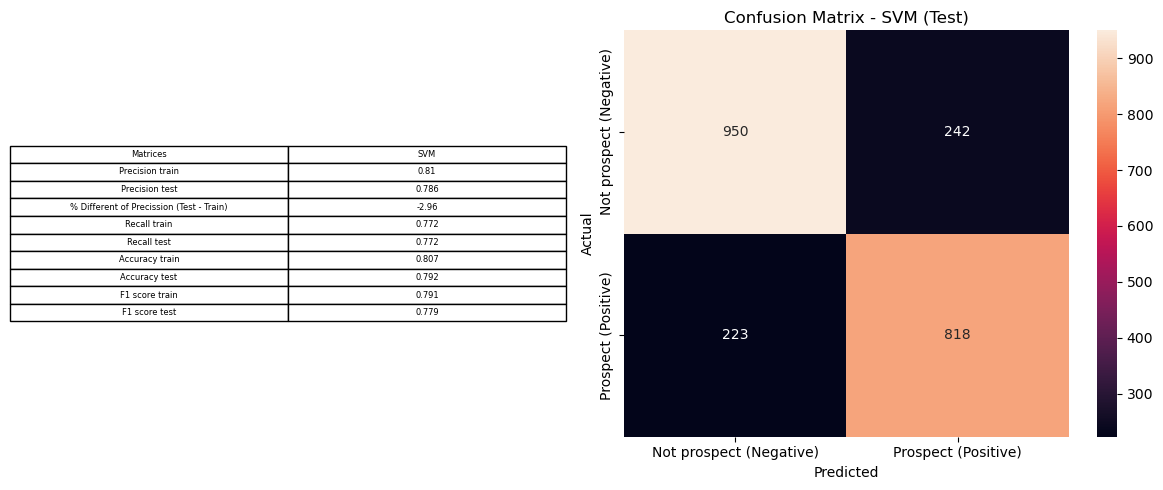

In [81]:
# Menghitung matriks evaluasi
matrices(ypred_trainSVM, ypred_testSVM, 'SVM')

# Menampilkan dataframe nilai evaluasi dan confussion matrix
confuss(ypred_testSVM, 'SVM', matriks)

Dari table dan confussion matrix di atas kita dapat mengambil beberapa kesimpulan :

1. Dilihat dari perbedaan nilai precision antara hasil prediksi dataset train (0.81) dan dataset test (0.786), model ini memiliki perbedaan - 2.96 % yang artinya ***hasil prediksi model cenderung bersifat sedikit overfitting***. Overfitting yang dihasilkan terbilang memiliki skala yang kecil. Pada dataset training, model memiliki tingkat kebenaran sebesar 81 % dalam memprediksi client potensial sementara pada dataset test model SVM memiliki tingkat kebenaran dalam memprediksi client potensial yang sedikit lebih rendah yaitu sebesar 78.6 %

2. Hasil overfitting juga terjadi pada matriks evaluasi accuracy dan F1 score, namun skalanya terbilang sangat kecil. Pada matriks recall, model ini memiliki score 77.2 % pada dataset taraining dan pada dataset test, dimana ***hal ini mengindikasikan jika dari keseluruhan client yang diprediksi masuk ke dalam kelas negative (non potensial), model ini berhasil memprediksi dengan tingkat kebenaran 100 %***

3. Dari hasil score keempat matriks evaluasi, maka dapat disimpulkan jika ***model SVM dengan hyperparameter default memiliki kemampuan yang baik dalam menggeneralisir data***

4. Dari confussion matriks dapat terlihat jika model berhasil memprediksi client - client dengan kelas true positive sebanyak 818 client, sementara 223 client yang secara aktualnya berasal dari kelas true positive diprediksi oleh model sebagai class negatif (hasil prediksi false negative)

#### Decission Tree

In [82]:
# Prediksi dataset train dan test
ypred_trainDT = decissionPipe.predict(xtrainfinal)
ypred_testDT = decissionPipe.predict(xtestfinal)

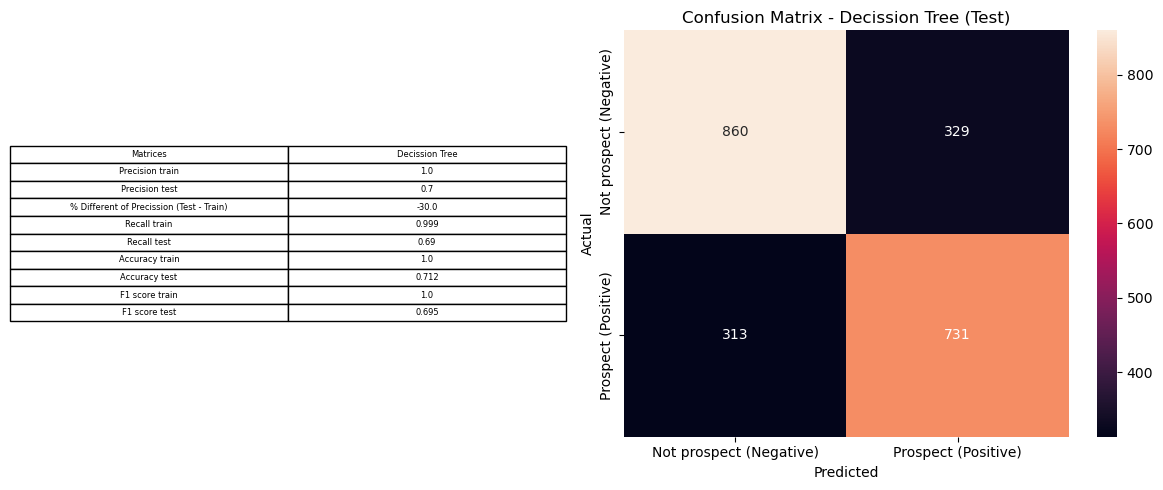

In [83]:
# Menghitung matriks evaluasi
matrices(ypred_trainDT, ypred_testDT, 'Decission Tree')

# Menampilkan dataframe nilai evaluasi dan confussion matrix
confuss(ypred_testDT, 'Decission Tree', matriks)

Dari table dan confussion matrix di atas kita dapat mengambil beberapa kesimpulan :

1. Dilihat dari perbedaan nilai precision antara hasil prediksi dataset train (1) dan dataset test (0.704), model ini memiliki perbedaan - 29.6 % yang artinya ***hasil prediksi model bersifat sangat overfitting***. Overfitting yang dihasilkan terbilang memiliki skala yang sangat besar. Pada dataset training, model memiliki tingkat kebenaran sebesar 100 % dalam memprediksi client potensial sementara pada dataset test model Decision Tree memiliki tingkat kebenaran dalam memprediksi client potensial yang lebih rendah yaitu sebesar 70.4 %

2. Hasil overfitting yang signifikan ini juga terjadi pada matriks evaluasi recall, accuracy, dan F1 score

3. Dari hasil overfitting pada keempat matriks di atas, maka dapat disimmpulkan bahwa ***model Decision Tree dengan hyperparameter default tidak dapat menggeneralisir data secara baik (pada kasus ini) sehingga ketika melakukan prediksi pada dataset yang berbeda, tingkat kebenaran model menjadi sangat turun***

4. Dari confussion matriks dapat terlihat jika model berhasil memprediksi client - client dengan kelas true positive sebanyak 743 client, sementara 312 client yang secara aktualnya berasal dari kelas true positive diprediksi oleh model sebagai class negatif (hasil prediksi false negative)

#### Random Forest

In [84]:
# Prediksi dataset train dan test
ypred_trainRF = forestPipe.predict(xtrainfinal)
ypred_testRF = forestPipe.predict(xtestfinal)

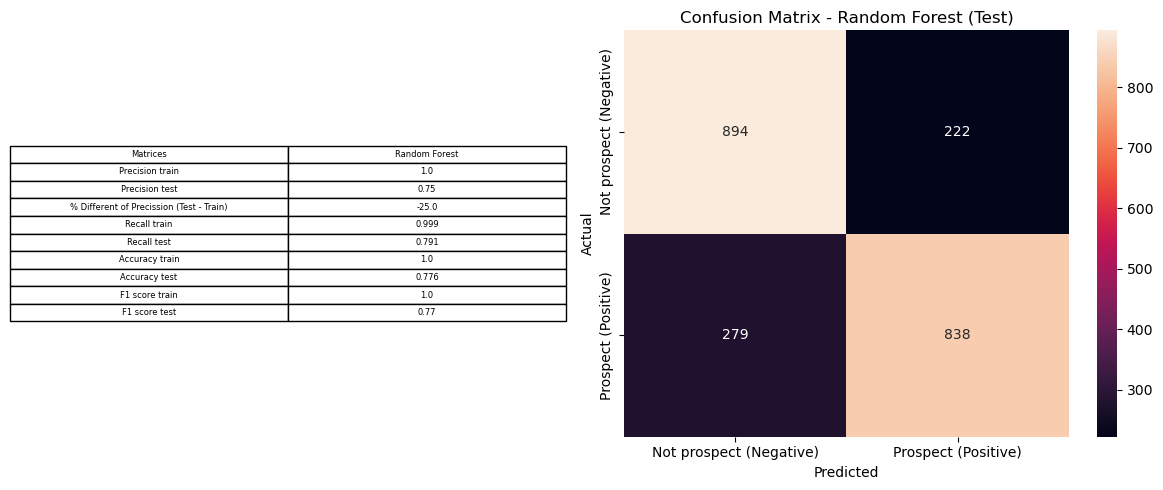

In [85]:
# Menghitung matriks evaluasi
matrices(ypred_trainRF, ypred_testRF, 'Random Forest')

# Menampilkan dataframe nilai evaluasi dan confussion matrix
confuss(ypred_testRF, 'Random Forest', matriks)

Dari table dan confussion matrix di atas kita dapat mengambil beberapa kesimpulan :

1. Dilihat dari perbedaan nilai precision antara hasil prediksi dataset train (1) dan dataset test (0.748), model ini memiliki perbedaan - 25.2 % yang artinya ***hasil prediksi model bersifat sangat overfitting***. Overfitting yang dihasilkan terbilang memiliki skala yang sangat besar. Pada dataset training, model memiliki tingkat kebenaran sebesar 100 % dalam memprediksi client potensial sementara pada dataset test model Random Forest memiliki tingkat kebenaran dalam memprediksi client potensial yang lebih rendah yaitu sebesar 74.8 %

2. Hasil overfitting yang signifikan ini juga terjadi pada matriks evaluasi recall, accuracy, dan F1 score

3. Dari hasil overfitting pada keempat matriks di atas, maka dapat disimmpulkan bahwa ***model Random Forest dengan hyperparameter default tidak dapat menggeneralisir data secara baik (pada kasus ini) sehingga ketika melakukan prediksi pada dataset yang berbeda, tingkat kebenaran model menjadi sangat turun***

4. Dari confussion matriks dapat terlihat jika model berhasil memprediksi client - client dengan kelas true positive sebanyak 839 client, sementara 283 client yang secara aktualnya berasal dari kelas true positive diprediksi oleh model sebagai class negatif (hasil prediksi false negative)

#### XGBoost

In [86]:
# Prediksi dataset train dan test
ypred_trainXGB = xgbPipe.predict(xtrainfinal)
ypred_testXGB = xgbPipe.predict(xtestfinal)

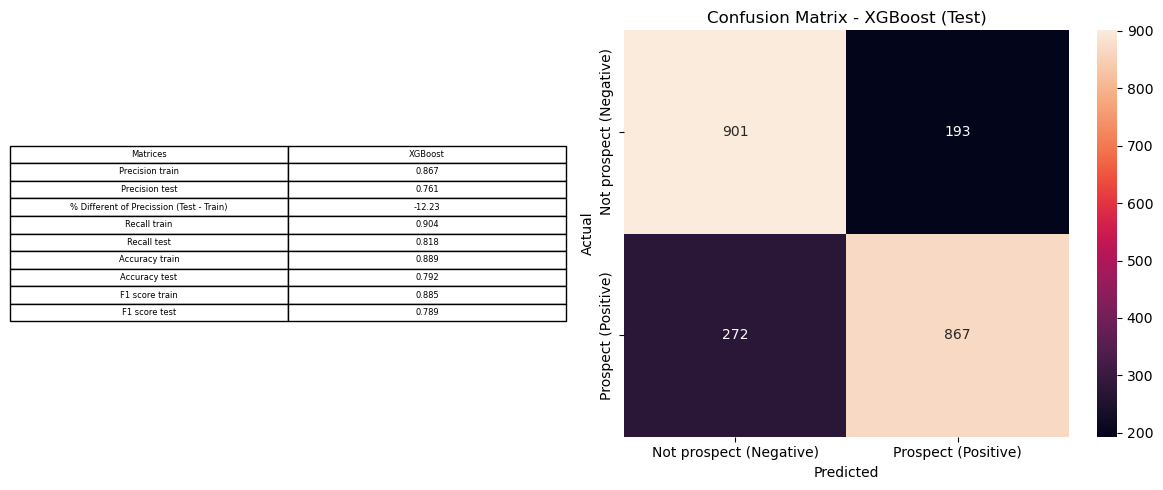

In [87]:
# Menghitung matriks evaluasi
matrices(ypred_trainXGB, ypred_testXGB, 'XGBoost')

# Menampilkan dataframe nilai evaluasi dan confussion matrix
confuss(ypred_testXGB, 'XGBoost', matriks)

Dari table dan confussion matrix di atas kita dapat mengambil beberapa kesimpulan :

1. Dilihat dari perbedaan nilai precision antara hasil prediksi dataset train (0.867) dan dataset test (0.761), model ini memiliki perbedaan - 12.23 % yang artinya ***hasil prediksi model bersifat overfitting***. Overfitting yang dihasilkan terbilang memiliki skala yang cukup besar. Pada dataset training, model memiliki tingkat kebenaran sebesar 86.7 % dalam memprediksi client potensial sementara pada dataset test model XGBoost memiliki tingkat kebenaran dalam memprediksi client potensial yang lebih rendah yaitu sebesar 76.1 %

2. Hasil overfitting juga terjadi pada matriks evaluasi recall, accuracy, dan F1 score

3. Dari hasil overfitting pada keempat matriks di atas, maka dapat disimmpulkan bahwa ***model XGBoost dengan hyperparameter default tidak dapat menggeneralisir data dengan cukup baik (pada kasus ini) sehingga ketika melakukan prediksi pada dataset yang berbeda, tingkat kebenaran model menjadi turun***

4. Dari confussion matriks dapat terlihat jika model berhasil memprediksi client - client dengan kelas true positive sebanyak 867 client, sementara 272 client yang secara aktualnya berasal dari kelas true positive diprediksi oleh model sebagai class negatif (hasil prediksi false negative)

#### Rangkuman hasil evaluasi model default

In [88]:
# Menampilkan dataframe hasil evaluasi model default
matriks

,Matrices,KNN,SVM,Decission Tree,Random Forest,XGBoost
0,Precision train,0.825,0.810,1.000,1.000,0.867
1,Precision test,0.727,0.786,0.700,0.750,0.761
2,% Different of Precission (Test - Train),-11.880,-2.960,-30.000,-25.000,-12.230
3,Recall train,0.843,0.772,0.999,0.999,0.904
4,Recall test,0.779,0.772,0.690,0.791,0.818
5,Accuracy train,0.841,0.807,1.000,1.000,0.889
6,Accuracy test,0.756,0.792,0.712,0.776,0.792
7,F1 score train,0.834,0.791,1.000,1.000,0.885
8,F1 score test,0.752,0.779,0.695,0.770,0.789


Dari table di atas kita dapat menyimpulkan beberapa hal :

1. Seluruh model dapat dianggap menghasilkan nilai precision yang cukup bagus pada hasil prediksi dataset train (karena di atas 80 %). Namun seluruh model memiliki hasil yang kurang bagus ketika memprediksi dataset test karena nilai precision dari seluruh model berada di bawah 80 %. Singkatnya, seluruh model mengalami overfitting baik dengan skala yang kecil maupun skala yang besar

2. Untuk nilai precision, model terbaik dalam menggeneralisir data adalah model SVM dimana perbedaan nilai precision antara hasil prediksi dataset train dengan dataset test memiliki persen perbedaan terkecil dibandingkan model lain yaitu hanya sebesar - 2.96 %. Model dengan presentase nilai perbedaan precision datatrain dan dataset tertinggi adalah model Decision Tree dengan presentase perbedaan sebesar - 29.6 %, diikuti dengan Random Forest sebesar - 25.2 %, XGBoost sebesar 12.23 %, dan KNN sebesar -11.88 %

3. Berdasarkan nilai accuracy, recall, dan F1 score, semua model default memiliki hasil yang overfitting. Jika dilihat dari ke 3 matriks tersebut, dapat dikatakan model SVM memiliki skala overfitting yang cukup rendah dibandingkan model - model lain. Hal ini makin memperkuat indikasi bahwa model SVM dalam kasus ini memiliki kemampuan generalisir terbaik dibandingkan model - model lain ketika dihadapkan pada matriks evaluasi yang berbeda

4. Jika dilihat, model - model yang menggunakan prinsip decision tree (seperti random forest, xgboost, dan decision tree itu sendiri) memiliki skala overfitting yang paling tinggi. Hal ini disebabkan karena algoritma decision tree sendiri memang sangat rentan terhadap overfitting karena algoritma ini mampu mempelajari pola-pola rumit dalam data, bahkan pola yang tidak relevan dengan tugas prediksi. Sebenarnya masalah ini dapat diselesaikan dengan model XGBoost karena model tersebut memiliki hyperparameter regularisasi, namun karena yang kita tes pada tahap ini adalah mode defaultnya maka kemungkinan besar hyperparameternya belum optimal


### 8.2. Cross Validation

Cross validation adalah teknik untuk mengevaluasi hasil training dari model. Teknik ini membantu untuk memastikan apakah hasil klasifikasi model pada dataset training konsisten ketika diberikan dataset dengan variasi yang berbeda. Metode ini bekerja dengan membagi dataset menjadi beberapa bagian partisi (ditentukan dengan parameter k-vold) dengan proporsi yang seimbang. Selanjutnya model akan melakukan prediksi menggunakan nilai features dari masing - masing partisi untuk kemudian hasilnya dibandingkan dengan nilai aktual target pada masing - masing partisi. Adapun alasan mengapa saya melakukan cross validation adalah sebagai berikut :

1. Memastikan jika model dapat menggeneralisir data pada dataset yang berbeda. Walaupun sebelumnya kita telah melakukan perbandingan nilai matriks evaluasi antara dataset test dengan dataset train, namun kita perlu melakukan validasi terhadap hasil tersebut dengan menggunakan data yang lebih bervariasi

2. Pemilihan model yang lebih valid. Dengan menguji ulang model menggunakan beberapa dataset yang lebih bervariasi, kita bisa mendapatkan gambaran yang lebih luas dan lengkap mengenai kinerja model dalam melakukan prediksi dan generalisir data

3. Memastikan jika model tidak menghasilkan hasil yang overfitting. Alasan ini terutama berlaku bagi model - model yang pada evaluasi sebelumnya memiliki skala overfitting yang kecil (kinerja bagus) seperti model SVM


***Catatan:*** :
Pada proses ini kita akan menambahkan beberapa matriks evaluasi tambahan pada datafram sebelumnya. Matriks tersebut antara lain adalah :
1. Precision CV mean
    Nilai rata - rata precision hasil cross validation
2. % Difference of Precision
    Presentase perbedaan nilai rata - rata precision hasil cross validation dengan nilai precision hasil prediksi dataset train
3. % Relative STD of Precision
    Presentase varians (std varasi) terhadap nilai mean precision hasil cross validation

***Cross validation akan dilakukan dengan membagi nilai dataset train  menjadi beberapa fold dan scoring yang dipakai adalah precision*** 

In [89]:
# Membuat fungsi untuk menampilkan hasil cross validation
matriks.loc[9, 'Matrices'] = 'Precission CV mean'
matriks.loc[10, 'Matrices'] = '% Difference of Precision'
matriks.loc[11, 'Matrices'] = '% Relative STD of Precision'

def cv(model, modelname) :
    # Membuat variable penampung nilai cross validation
    global xtestfinal, ytrain
    precissiontrain_cv = cross_val_score(model, xtrainfinal, ytrain, cv=5, scoring="precision")

    # Menampilkan nilai recall, meadn, dan standar deviasi
    print('Precission Score - All - Cross Validation  : ', precissiontrain_cv)
    print('Precission Score - Mean - Cross Validation : ', precissiontrain_cv.mean())
    print('Precission Score - Std - Cross Validation  : ', precissiontrain_cv.std())

    # Memasukan nilai kedalam dataframe
    global matriks
    matriks.loc[9,modelname] = round(precissiontrain_cv.mean(),3)
    matriks.loc[10,modelname] = round(((precissiontrain_cv.mean()- matriks.loc[0,modelname])*100/matriks.loc[0,modelname]),3)
    matriks.loc[11,modelname] = round((precissiontrain_cv.std()*100/precissiontrain_cv.mean()),3)

#### KNN

In [90]:
# Proses cross validation
cv(knnPipe,'KNN')

Precission Score - All - Cross Validation  :  [0.75522042 0.75873732 0.74887892 0.78349282 0.76429405]
Precission Score - Mean - Cross Validation :  0.7621247060346196
Precission Score - Std - Cross Validation  :  0.011797430416865054


#### SVM

In [91]:
# Proses cross validation
cv(svmPipe,'SVM')

Precission Score - All - Cross Validation  :  [0.80074257 0.78896882 0.78940731 0.83629442 0.81282723]
Precission Score - Mean - Cross Validation :  0.8056480709138993
Precission Score - Std - Cross Validation  :  0.01764518102068191


#### Decission Tree

In [92]:
# Proses cross validation
cv(decissionPipe,'Decission Tree')

Precission Score - All - Cross Validation  :  [0.72738239 0.71297359 0.70034443 0.75345912 0.73229292]
Precission Score - Mean - Cross Validation :  0.7252904900683658
Precission Score - Std - Cross Validation  :  0.018004963070938743


#### Random Forest

In [93]:
# Proses cross validation
cv(forestPipe,'Random Forest')

Precission Score - All - Cross Validation  :  [0.76966292 0.77703456 0.75516866 0.80496454 0.7960373 ]
Precission Score - Mean - Cross Validation :  0.7805735955249283
Precission Score - Std - Cross Validation  :  0.017950055218585146


#### XGBoost

In [94]:
# Proses cross validation
cv(xgbPipe,'XGBoost')

Precission Score - All - Cross Validation  :  [0.78728324 0.77740864 0.7615894  0.80394432 0.8       ]
Precission Score - Mean - Cross Validation :  0.7860451188773455
Precission Score - Std - Cross Validation  :  0.015422864069672181


In [95]:
# Menampilkan dataframe hasil cross validation
matriks

,Matrices,KNN,SVM,Decission Tree,Random Forest,XGBoost
0,Precision train,0.825,0.810,1.000,1.000,0.867
1,Precision test,0.727,0.786,0.700,0.750,0.761
2,% Different of Precission (Test - Train),-11.880,-2.960,-30.000,-25.000,-12.230
3,Recall train,0.843,0.772,0.999,0.999,0.904
4,Recall test,0.779,0.772,0.690,0.791,0.818
5,Accuracy train,0.841,0.807,1.000,1.000,0.889
6,Accuracy test,0.756,0.792,0.712,0.776,0.792
7,F1 score train,0.834,0.791,1.000,1.000,0.885
8,F1 score test,0.752,0.779,0.695,0.770,0.789
9,Precission CV mean,0.762,0.806,0.725,0.781,0.786


Dari table di atas kita dapat merangkum informasi sebagai berikut :

1. KNN

    Model ini memiliki nilai rata - rata precision sebesar 76.2 %. Jika dibandingkan dengan nilai precision hasil prediksi datsaet train sebelumnya maka dapat disimpulkan bahwa nilai keduanya memiliki perbedaan yang cukup signifikan dengan presentase perbedaanya sebesar - 7.62 %. Dilihat dari nilai relative std of precisionnya yang sebesar 1.548 %, maka dapat disimpulkan jika variasi hasil cross validationnya tergolong kecil. ***Dari kedua penjelasan di atas, maka dapat disimpulkan bahwa model KNN tidak begitu baik dalam menggeneralisir data. Hal ini dibuktikan dari perbedaan yang cukup signifikan antara nilai precision hasil prediksi dataset train sebelumnya dengan nilai precision hasil cross validation***


2. SVM

    Model ini memiliki nilai rata - rata precision tertinggi yaitu sebesar 80.6 %. Jika dibandingkan dengan nilai precision hasil prediksi datsaet train sebelumnya maka dapat disimpulkan bahwa nilai keduanya hampir mirip (hanya berbeda sekitar 0.537 %). Dilihat dari nilai relative std of precisionnya yang sebesar 2.19 %, maka dapat disimpulkan jika variasi hasil cross validationnya tidak begitu besar. ***Dari kedua penjelasan di atas, maka dapat disimpulkan bahwa model SVM memiliki konsistensi yang baik dalam menggeneralisir data dengan perbedaan hasil pada tiap prediksi dataset yang berbeda memiliki nilai yang kecil***


3. Decission Tree

    Model ini memiliki nilai rata - rata precision sebesar 72.3 %. Jika dibandingkan dengan nilai precision hasil prediksi datsaet train sebelumnya maka dapat disimpulkan bahwa model ini memiliki nilai perbedaan yang paling signifikan dibandingkan nilai perbedaa precision pada model lain (nilai perbedaanya sebesar - 27.681 %). Dilihat dari nilai relative std of precisionnya yang sebesar 2.47 %, maka dapat disimpulkan jika variasi hasil cross validationnya tidak begitu besar. ***Dari kedua penjelasan di atas, maka dapat disimpulkan bahwa model Decision Tree tidak begitu baik dalam menggeneralisir data karena nilai perbedaan yang  sangat signifikan antara nilai precision hasil prediksi dataset train sebelumnya dengan nilai precision hasil cross validation***


4. Random Forest

    Model ini memiliki nilai rata - rata precision sebesar 78.1 %. Jika dibandingkan dengan nilai precision hasil prediksi datsaet train sebelumnya maka dapat disimpulkan bahwa model ini memiliki nilai perbedaan yang signifikan dengan presentase perbedaan sebesar -21.894 %. Dilihat dari nilai relative std of precisionnya yang sebesar 2.27 %, maka dapat disimpulkan jika variasi hasil cross validationnya tidak begitu besar. ***Dari kedua penjelasan di atas, maka dapat disimpulkan bahwa model Random Forest tidak begitu baik dalam menggeneralisir data karena nilai perbedaan yang signifikan antara nilai hasil prediksi precision dataset train sebelumnya dengan nilai precision hasil cross validation***
    

5. XGBoost

    Model ini memiliki nilai rata - rata precision sebesar 78.6 %. Jika dibandingkan dengan nilai precision hasil prediksi datsaet train sebelumnya maka dapat disimpulkan bahwa model ini memiliki nilai perbedaan yang cukup signifikan dengan presentase perbedaan sebesar -9.377 %. Dilihat dari nilai relative std of precisionnya yang sebesar 1.962 %, maka dapat disimpulkan jika variasi hasil cross validationnya tidak begitu besar. ***Dari kedua penjelasan di atas, maka dapat disimpulkan bahwa model XGBoost tidak begitu baik dalam menggeneralisir data karena nilai perbedaan yang cukup signifikan antara nilai precision hasil prediksi dataset train sebelumnya dengan nilai precision hasil cross validation***


Dari rangkuman di atas maka dipilih model SVM sebagai model yang akan digunakan pada project ini. ***Pemilihan tersebut didasarkan pada alasan bahwa model SVM memiliki kemampuan yang baik dalam mengeneralisir data sehingga hasil prediksinya memiliki nilai score yang lebih konsisten walaupun dihadapkan pada dataset yang berbeda atau dapat juga dikatakan bahwa hasil prediksi sebelumnya memiliki tingkat validasi yang tinggi. Selain itu, alasan lainnya adalah bahwa model SVM menghasilkan nilai rata - rata precision hasil cross validation yang paling tinggi di antara model lain dengan nilai presentase relative standard deviation yang rendah.***
 
    

### 8.3. Hyperparameter Tuning

Proses hyperparameter tuning ditujukan untuk mendapatkan nilai hyperparameter yang optimal atau nilai hyperparameter yang dapat menghasilkan nilai matriks evaluasi tertinggi (dalam konteks ini adalah precision). Model yang dipilih adalah SVM dengan 4 hyperparameter yang akan ditrial. Hyperparameter tersebut antara lain adalah 'C' (regularisasi), gamma, degree, dan kernel. Berikut penjelassan dari masing - masing hyperparameter :

1. C (faktor regulariasasi)
Fungsi nya adalah untuk menentukan lebar margin pada hyperplane

2. Gamma
Gamma adalah parameter yang mengontrol jangkauan pengaruh dari sebuah titik data. Parameter ini mengukur seberapa jauh atau dekat titik data sehingga dapat mempengaruhi bentuk hyperplane. Gamma digunakan pada model SVM yang menggunakan kernal RBF

3. Degree
Hyerparameter yang digunakan pada SVM yang menggunakan kernel Polynominal. Degree akan mengatur seberapa kompleks bentuk atau lengkungan hyperplane. Semakin rendah degree maka akan semakin linear garis hyperplanenya, begitu juga sebaliknya

4. Kernel
Adalah hyperparameter yang berfungsi untuk membuat algoritma bekerja pada dimensi yang lebih tinggi. Jika suatu dataset sulit dibuat hyperplanenya (terutama jika hyperplanenya linear) pada dimensi 2D, maka kernel dapat membuat dataset menjadi berdimensi 3D untuk mempermudah pembuatan hyperplane atau decission boundary. Kernel yang akan kita trial adalah kernel polynomial dan rbf

Pada metode hypertuning ini kita akan menggunakan metode RandomizedSearchCV untuk melakukan proses tuning.

In [96]:
# Membuat dictionaries penampung hyper parameter
svm_rand = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [1, 0.1, 0.01],
    'classifier__degree': [1, 2, 3],
    'classifier__kernel': ['poly', 'rbf']
}

In [97]:
# Membuat objek RandomizedSearch
random_search = RandomizedSearchCV(svmPipe, param_distributions=svm_rand,cv=5,
                           scoring='precision',
                           return_train_score=True,
                           n_jobs=-1,
                           random_state=100)

# Proses pembelajaran model
random_search.fit(xtrainfinal, ytrain)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('scaler',
                                                                               RobustScaler(),
                                                                               ['balance',
                                                                                'duration',
                                                                                'campaign',
                                                                                'pdays',
                                                                                'previous']),
                                                                              ('encoding',
                                                                               OrdinalEncoder(),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'poutcome'])])),
                                             ('classifier', SVC())]),
                   n_jobs=-1,
                   param_distributions={'classifier__C': [0.1, 1, 10],
                                        'classifier__degree': [1, 2, 3],
                                        'classifier__gamma': [1, 0.1, 0.01],
                                        'classifier__kernel': ['poly', 'rbf']},
                   random_state=100, return_train_score=True,
                   scoring='precision')

In [98]:
# Menampilkan hyperparameter terbaik
random_search.best_params_

{'classifier__kernel': 'poly',
 'classifier__gamma': 0.01,
 'classifier__degree': 2,
 'classifier__C': 1}

In [99]:
# Menampilkan best score
random_search.best_score_

0.821513309295565

Dari hasil proses tuning di atas, didapatkan hyperparameter paling optimal sebagai berikut :
1. C (regularisasi) = 1

2. degree           = 2

3. gamma            = 0.01

4. Kernel           = Polynomial

### 8.4. Evaluasi Model Dengan Hyperparameter Hasil Tuning

In [100]:
# Membuat dataframe penampung nilai matriks evaluasi
matriksFinal = pd.DataFrame({'Matrices' : ['Precision train', 'Precision test','% Different of Precission (Test - Train)', 'Recall train', 'Recall test',
                                      'Accuracy train', 'Accuracy test', 'F1 score train', 'F1 score test']})

# Membuat fungsi untuk menghitung nilai matriks evaluasi
def matricesFinal(ypred_train, ypred_test, modelname) :

    global ytrain, ytest
    
    # Evaluasi dengan precision
    precision_train = round(precision_score(ytrain, ypred_train),3)
    precision_test = round(precision_score(ytest, ypred_test),3)

    # Evaluasi dengan recall
    recall_train = round(recall_score(ytrain, ypred_train),3)
    recall_test = round(recall_score(ytest,ypred_test),3)

    # Evaluasi dengan accuracy
    acuracy_train = round(accuracy_score(ytrain, ypred_train),3)
    acuracy_test = round(accuracy_score(ytest,ypred_test),3)

    # Evaluasi dengan F1 score
    f1train = round(f1_score(ytrain, ypred_train),3)
    f1test = round(f1_score(ytest, ypred_test),3)

    # Evaluasi perbedaan precission antara train dengan test
    precentdifferent = round(((precision_test - precision_train)*100/precision_train),2)

    matriksFinal[modelname] = [precision_train, precision_test, precentdifferent, recall_train, recall_test, acuracy_train, acuracy_test,
                        f1train, f1test]

In [101]:
# Membuat model dengan best param
svmTunned = random_search.best_estimator_

# Prediksi dataset train dan test
ypred_train_tunnedSVM = svmTunned.predict(xtrainfinal)
ypred_test_tunned_SVM = svmTunned.predict(xtestfinal)


In [102]:
# Menghitung matriks evaluasi
matricesFinal(ypred_trainSVM, ypred_testSVM, 'SVM Default')
matricesFinal(ypred_train_tunnedSVM, ypred_test_tunned_SVM, 'Tuned SVM')

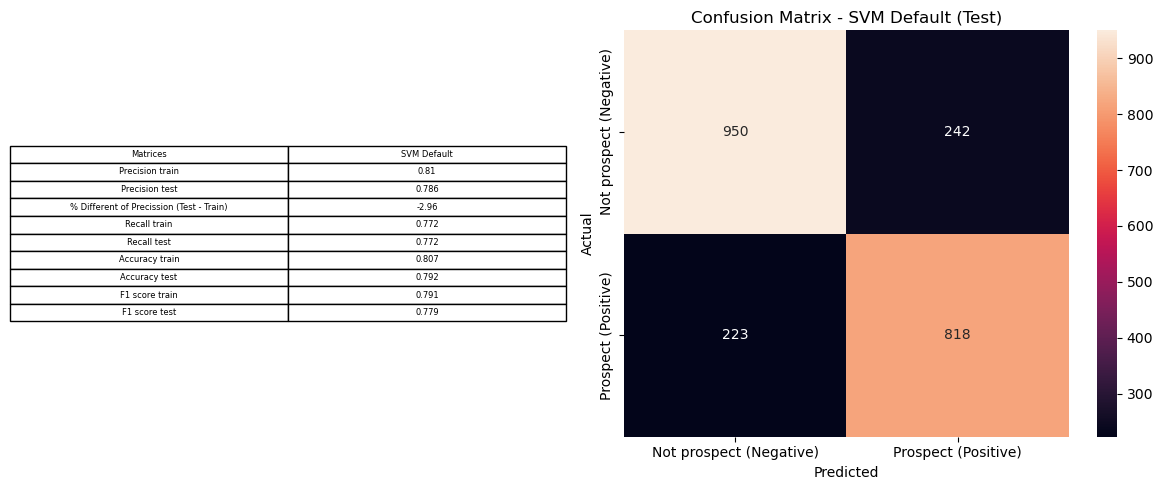

In [103]:
# Menampilkan dataframe nilai evaluasi dan confussion matrix SVM default
confuss(ypred_testSVM, 'SVM Default', matriksFinal)

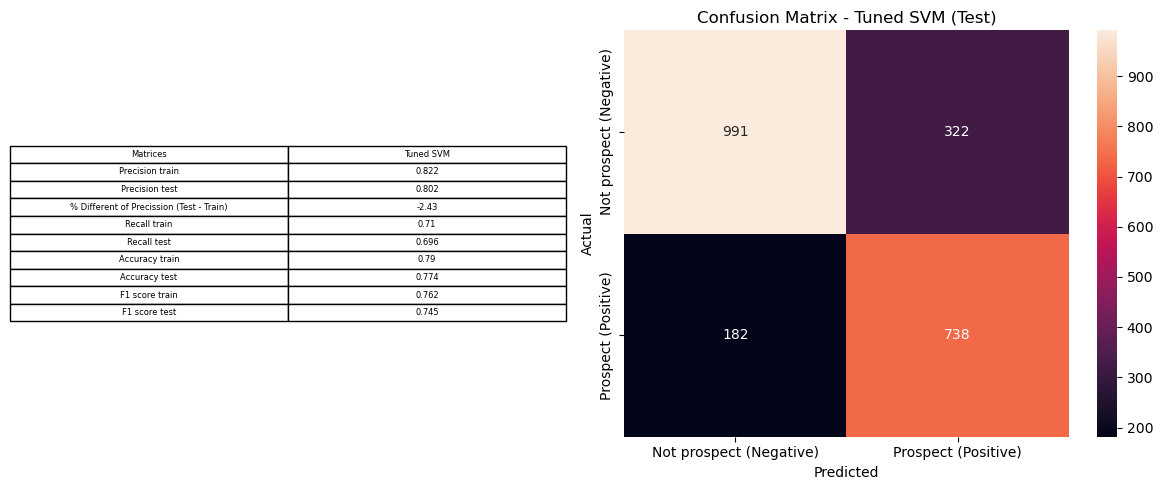

In [104]:
# Menampilkan dataframe nilai evaluasi dan confussion matrix SVM dengan hyperparameter tuning
confuss(ypred_test_tunned_SVM, 'Tuned SVM', matriksFinal)

In [105]:
# Menampilkan perbandingan hasil evaluasi 
matriksFinal

,Matrices,SVM Default,Tuned SVM
0,Precision train,0.810,0.822
1,Precision test,0.786,0.802
2,% Different of Precission (Test - Train),-2.960,-2.430
3,Recall train,0.772,0.710
4,Recall test,0.772,0.696
5,Accuracy train,0.807,0.790
6,Accuracy test,0.792,0.774
7,F1 score train,0.791,0.762
8,F1 score test,0.779,0.745


Dari data table dan confussion matrix di atas kita dapat merangkum informasi sebagai berikut :

1. Baik hasil prediksi dataset train maupun hasil prediksi dataset test, model SVM yang menggunakan hyperparameter tuning memiliki nilai precision tertinggi (82.2 % pada dataset train dan 80.2 % pada dataset test) dibandingkan model SVM dengan hyperparameter default (81 % pada dataset train dan 78.6 % pada dataset test)

2. Presentase perbedaan nilai precision antara hasil prediksi dataset train dan hasil prediksi dataset test pada model SVM dengan hyperparameter hasil tuning nilainya lebih kecil dibandingkan model SVM yang menggunakan hyperparameter default. ***Hal ini memiliki arti bahwa dari segi overfitting dan generalisir data, model SVM dengan hyperparameter hasil tuning sedikit lebih baik dibandingkan model SVM dengan hyperparameter default***

3. Pada hasil prediksi dataset train dan dataset test, nilai matriks recall, accuracy, dan F1 score yang dihasilkan oleh model dengan hyperparameter default memiliki nilai yang sedikit lebih tinggi dibandingkan yang dihasilkan oleh model dengan hyperparameter hasil tuning



Dari 3 informasi di atas maka dapat disimpulkan jika model SVM dengan hyperparameter hasil tuning memiliki hasil yang sedikit lebih baik ketika melakukan prediksi client dari kelas positive (client potensial) sehingga nilai pada matriks precision model ini cenderung lebih besar dibandingkan nilai precision yang dihasilkan model dengan hyperparameter default. Namun, model SVM yang menggunakan hyperparameter hasil tuning memiliki hasil yang sedikit kurang baik ketika dihadapkan pada prediksi kelas negative (client non potensial) dibandingkan dengan model yang menggunakan hyperparameter default, sehingga seperti yang dapat terlihat pada table di atas, nilai recall, F1 score, dan accuracy model yang menggunakan hyperparameter hasil tuning nilainya sedikit lebih kecil dibandingkan model yang menggunakan hyperparameter default.



# 9. Model Saving

In [110]:
# Model saving
with open('model.pkl', 'wb') as file_1:
    pickle.dump(svmTunned, file_1)

# 10. Model Inference

Model inference dilakukan pada file ipynb yang berbeda

# 11. Kesimpulan

### EDA
1. Presentase client yang memutuskan untuk melakukan investasi term deposit sebesar 47 % sementara yang tidak memutuskan untuk melakukan investasi sebanyak 53 %. Hal ini memiliki arti bahwa dari 11162 kegiatan pemasaran, tingkat keberhasilannya sebesar 47 %

2. 5 kelompok client terbesar yang dihubungi oleh agen pemasaran berdasarkan pekerjaannya adalah management (23 %), blue-collar (17 %), technician (16 %), admin (12 %), dan services (8 %)

3. Berdasarkan jenis pekerjaannya, 3 kelompok client yang memiliki conversion rate tertinggi justru berasal dari kelompok yang tidak memiliki pekerjaan aktif. 3 pekerjaan client tersebut adalah student (74.72 %), retired (66.32 %), dan unemployed (56.58 %). Kemungkinan hal ini terjadi karena orang - orang yang tidak memiliki pekerjaan aktif lebih memilih untuk mengurangi konsumsinya dan memfokuskan sumber dayanya pada instument - instrument yang dapat menghasilkan pasive income

4. Pada kasus ini hampir tidak ada hubungan positif antara balance dan conversion rate karena distribusi balance antara yang memumutuskan untuk berinvestasi dengan yang tidak memutuskan untuk berinvestasi memiliki distribusi yang hampir mirip

5. Kemungkinan besar, penentu nilai conversion rate lebih bergantung pada kondisi keuangan masa depan dari client. Hal ini disebabkan karena client yang memiliki conversion rate tertinggi justru berasal dari client - client yang tidak memiliki pekerjaan aktif dan memiliki nilai balance yang tidak terlalu tinggi (kecuali kelompok retired), atau dapat dikatakan client - client tersebut tidak memiliki kondisi keuangan yang dapat diprediksi di masa depan karena tidak memiliki sumber active incomes

6. Berdasarkan status maritalnya, client dengan conversion rate tertinggi berasal dari kelompok yang belum menikah dengan presentase conversion rate sebesar 54.3%, diikuti oleh client yang berasal dari kelompok dengan status bercerai (48.1 %), dan terakhir client yang memiliki status menikah (43.4 %)

7. Client akan cenderung melakukan investasi term deposit jika mereka tidak memiliki housing loan. Hal ini dikarenakan sebagian besar client yang memutuskan untuk melakukan investasi berasal dari kelompok yang tidak memiliki housing loan (3354 orang). Sementara itu, sebagian besar client yang memutuskan untuk tidak melakukan investasi berasal dari kelompok yang memiliki housing loan (3346)

### Model 
1. Model dievaluasi dengan matriks precision dengan alasan menghindari hasil prediksi false positive atau client yang secara aktual tidak potensial namun hasil prediksi justru memasukan client tersebut kedalam kelas potensial. Hal ini didasarkan pada tujuan project ini yaitu untuk meningkatkan efisiensi kegiatan pemasaran team marketing dengan cara pembuatan model yang dapat memprediksi client - client yang memiliki potensi dalam melakukan investasi term deposit. Hasil prediksi client potensial yang salah dapat menyebabkan kerugian pada team marketing karena mengurangi efiesiensi pemasaran

2. Terdapat 5 model yang ditrial dalam mode default, yaitu KNN, SVM, Decision Tree, Random Forest, dan XGBoost. Seluruh model menghasilkan hasil prediksi yang overfit (berdasarkan nilai precision) karena seluruh nilai precision yang didapatkan dari hasil prediksi dataset train berada di atas 80 % sementara nilai precision yang didapatkan dari hasil prediksi dataset test berada dibawah 80 %

3. Pada evaluasi hasil prediksi model dengan hyperparameter default, model SVM memiliki skala overfitting yang paling rendah dibandingkan model - model lain karena model tersebut memiliki perbedaan nilai precision terkecil antara hasil prediksi dataset train dengan dataset test. Singkatnya dapat dikatakan bahwa model SVM memiliki kemampuan menggeneralisir data yang lebih baik dibandingkan model lain.

4. Pada proses cross validation, dipilih model SVM sebagai model terbaik yang akan melalui proses hyperparameter tuning. Hal ini didasarkan pada alasan :
- model tersebut memiliki nilai rata - rata precision hasil cross validation tertinggi (80.6 %) dengan nilai relative standard deviation yang tergolong kecil (2.19 %)
- Selisih antara nilai rata - rata precision hasil cross validation dengan nilai precision hasil prediksi awal memiliki skala yang kecil yaitu hanya sebesar 0.537 %
- Kedua alasan di atas menghasilkan kesimpulan bahwa model SVM memiliki konsistensi yang baik dalam menggeneralisir data dengan perbedaan hasil pada tiap prediksi dataset yang berbeda memiliki nilai yang sangat kecil


5. Nilai hyperparameter yang didapatkan setelah proses hyperparameter tuning adalah sebagai berikut :

    - c             = 1

    - degree        = 2

    - gamma         = 0.01

    - kernel        = polynomial
    
6. Baik hasil prediksi dataset train maupun hasil prediksi dataset test, model SVM yang menggunakan hyperparameter tuning memiliki nilai precision tertinggi (82.2 % pada dataset train dan 80.2 % pada dataset test) dibandingkan model SVM dengan hyperparameter default (81 % pada dataset train dan 78.6 % pada dataset test)

7. Dari segi overfitting (matriks precision) dan generalisir data, model SVM dengan hyperparameter hasil tuning sedikit lebih baik dibandingkan model SVM dengan hyperparameter default

8. Dari 7 kesimpulan di atas, maka dapat disimpulkan jika model SVM yang menggunakan hyperparameter hasil tuning layak digunakan untuk dijadikan alat prediksi client potensial

### Model Imporvement
1. Tingkatkan nilai precision model. Hal ini dapat dilakukan dengan cara hyperparameter tuning ulang menggunakan variasi nilai yang hyperparameter yang lebih banyak. Nilai hyperparameter yang lebih banyak akan membuka kemungkinan yang lebih besar dalam mendapatkan nilai hyperparameter yang lebih baik

2. Menggunakan metode GridSearch pada proses hyperparameter tuning. Karena pada pemodelan kali ini proses tuning menggunakan metode RandomSearch, maka ada kemungkinan terdapat kombinasi nilai hyperparameter yang lebih baik

